
```python
import pandas as pd

excel_file_path = '/content/drive/MyDrive/Datasets/marks_dataset.xlsx'

# Load the Excel file to inspect sheet names and structure
xcel = pd.ExcelFile(excel_file_path)
sheet_names = xcel.sheet_names

all_cleaned_raw_data = {}

for sheet_name in sheet_names:
    print(f"Processing sheet: {sheet_name}")
    # Load the sheet, initially reading all rows to inspect structure
    # Use header=None to prevent pandas from automatically setting headers
    df_raw = pd.read_excel(xcel, sheet_name=sheet_name, header=None)

    # The actual column headers are in the first data row (index 0)
    # The data starts from row index 3
    # The 'Weightage:' row is at index 0, 'Total' at index 1, 'Sr.#' at index 2
    # So, the data begins from row 3.
    # The column names are in row 0, but 'Unnamed: 0' should be 'Student_ID'
    
    # Extract original column names from the first row of the raw dataframe
    # Fill NaN values with an empty string for safety when creating new column names
    original_cols = df_raw.iloc[0].fillna('').tolist()

    # Create new column names, replacing 'Unnamed: 0' with 'Student_ID'
    new_column_names = ['Student_ID' if col == '' or 'Unnamed: 0' in str(col) else col for col in original_cols]

    # Load the actual data, skipping the first three rows and assigning the new column names
    # Skiprows specifies how many rows to skip from the beginning (0, 1, 2)
    # Header=None ensures we assign our custom column names
    df_cleaned = pd.read_excel(xcel, sheet_name=sheet_name, skiprows=[0, 1, 2], header=None)
    df_cleaned.columns = new_column_names
    
    # The 'Sr.#' row sometimes has 'Sr.#' as column name and then NaN values
    # The actual student ID is in the first column for data rows.
    # We should rename the first column to 'Student_ID' explicitly and convert to numeric.
    if 'Student_ID' in df_cleaned.columns:
        df_cleaned['Student_ID'] = df_cleaned['Student_ID'].astype(int)
    else:
        # If somehow 'Unnamed: 0' wasn't renamed or another issue, ensure Student_ID
        df_cleaned.rename(columns={df_cleaned.columns[0]: 'Student_ID'}, inplace=True)
        df_cleaned['Student_ID'] = df_cleaned['Student_ID'].astype(int)

    # Drop any rows that are entirely NaN after initial cleaning, if any exist
    df_cleaned.dropna(how='all', inplace=True)
    
    # Store the cleaned DataFrame
    all_cleaned_raw_data[sheet_name] = df_cleaned
    
    print(f"Cleaned data for sheet '{sheet_name}'. First 5 rows:\n{df_cleaned.head()}")
    print(f"Shape: {df_cleaned.shape}\n")

# Display the head of each cleaned DataFrame to confirm
for sheet_name, df in all_cleaned_raw_data.items():
    print(f"--- Cleaned Raw Data for Sheet: {sheet_name} ---")
    print(df.head())
    print("\n")
```

## Load All Excel Sheets and Initial Cleaning (Raw Scores)

### Subtask:
Load each sheet from the 'marks_dataset.xlsx' file, clean the initial rows to remove metadata ('Weightage:', 'Total', 'Sr.#'), and set appropriate column headers using the assessment names. The resulting DataFrames will contain only raw student marks, with no normalization applied. The weightage column will be ignored.


**Reasoning**:
The subtask requires loading each Excel sheet, cleaning metadata rows, setting appropriate column headers, renaming 'Unnamed: 0' to 'Student_ID', converting 'Student_ID' to integer, and storing the cleaned dataframes. The previous step already loaded the Excel file and identified sheet names, so now I will implement the cleaning and transformation logic for each sheet.



In [ ]:
all_cleaned_raw_data = {}

for sheet_name in sheet_names:
    # Load the sheet. By default, header=0, which means the first row is used as column names.
    # This is correct for 'As:1', 'Qz:1', etc. which are in the first row.
    df_sheet = pd.read_excel(xcel, sheet_name=sheet_name)

    # Drop the first 3 rows which contain 'Weightage:', 'Total', and 'Sr.#' metadata.
    df_sheet = df_sheet.iloc[3:].copy()

    # Rename 'Unnamed: 0' column to 'Student_ID'
    df_sheet = df_sheet.rename(columns={'Unnamed: 0': 'Student_ID'})

    # Reset the index after dropping rows
    df_sheet = df_sheet.reset_index(drop=True)

    # Convert 'Student_ID' to numeric, coercing errors to NaN, then drop NaNs and convert to int
    df_sheet['Student_ID'] = pd.to_numeric(df_sheet['Student_ID'], errors='coerce')
    df_sheet.dropna(subset=['Student_ID'], inplace=True)
    df_sheet['Student_ID'] = df_sheet['Student_ID'].astype(int)

    # Store the cleaned DataFrame
    all_cleaned_raw_data[sheet_name] = df_sheet

    print(f"\n--- Cleaned content of sheet: {sheet_name} ---")
    print(df_sheet.head())
    print(f"Shape of cleaned sheet {sheet_name}: {df_sheet.shape}")


--- Cleaned content of sheet: 1 ---
   Student_ID   As:1  As:2  As:3  As:4   As:5  As:6  Qz:1  Qz:2  Qz:3  ...  \
0           1   80.5  60.5  73.5  40.5   59.0  70.5   3.5   5.0   2.0  ...   
1           2   72.5  68.0  39.0  35.0   80.5  71.0   2.5   7.0   0.0  ...   
2           3  113.0  62.0   0.0  47.0   80.0  80.0   3.5   2.5   1.0  ...   
3           4   61.0  43.5   0.0  22.0    NaN  50.0   1.5   5.0   0.5  ...   
4           5  104.0  67.0  72.5  45.0  120.0  90.0   5.0  10.5  10.0  ...   

   Qz:5  Qz:6  Qz:7  Qz:8  S-I:1    S-I  S-II:1  S-II  Final:1  Final  
0   NaN   2.5   9.0   2.0   17.5   6.56    6.25  2.34    35.75  16.08  
1   7.0   5.0  10.0   2.0   12.5   4.68   11.00  4.12    53.50  24.07  
2   2.0   1.0  12.0   2.0    9.5   3.56    6.50  2.43    32.50  14.62  
3   0.0   1.0   3.0   NaN   18.5   6.93    9.00  3.37    28.00  12.60  
4   6.5   5.0   9.0   2.0   28.5  10.68   17.50  6.56    74.75  33.63  

[5 rows x 21 columns]
Shape of cleaned sheet 1: (34, 21)

---

**Reasoning**:
The subtask requires consolidating all cleaned dataframes into a single DataFrame and adding a 'Sheet_ID' column to track the origin of the data. I will iterate through the `all_cleaned_raw_data` dictionary, add the sheet name as 'Sheet_ID' to each DataFrame, and then concatenate all of them into a single DataFrame.



In [ ]:
all_consolidated_dfs = []

for sheet_id, df in all_cleaned_raw_data.items():
    df_copy = df.copy()
    df_copy['Sheet_ID'] = sheet_id
    all_consolidated_dfs.append(df_copy)

# Concatenate all dataframes into a single one
consolidated_data_with_sheet_id = pd.concat(all_consolidated_dfs, ignore_index=True)

print("Consolidated DataFrame with Sheet ID:")
print(consolidated_data_with_sheet_id.head())
print(f"Shape of consolidated_data_with_sheet_id: {consolidated_data_with_sheet_id.shape}")

Consolidated DataFrame with Sheet ID:
   Student_ID   As:1  As:2  As:3  As:4   As:5  As:6  Qz:1  Qz:2  Qz:3  ...  \
0           1   80.5  60.5  73.5  40.5   59.0  70.5   3.5   5.0   2.0  ...   
1           2   72.5  68.0  39.0  35.0   80.5  71.0   2.5   7.0   0.0  ...   
2           3  113.0  62.0   0.0  47.0   80.0  80.0   3.5   2.5   1.0  ...   
3           4   61.0  43.5   0.0  22.0    NaN  50.0   1.5   5.0   0.5  ...   
4           5  104.0  67.0  72.5  45.0  120.0  90.0   5.0  10.5  10.0  ...   

   Proj:1  Proj  S-I:2  S-I:3  S-II:2  S-II:3  Final:2  Final:3  Final:4  \
0     NaN   NaN    NaN    NaN     NaN     NaN      NaN      NaN      NaN   
1     NaN   NaN    NaN    NaN     NaN     NaN      NaN      NaN      NaN   
2     NaN   NaN    NaN    NaN     NaN     NaN      NaN      NaN      NaN   
3     NaN   NaN    NaN    NaN     NaN     NaN      NaN      NaN      NaN   
4     NaN   NaN    NaN    NaN     NaN     NaN      NaN      NaN      NaN   

   Final:5  
0      NaN  
1      NaN

## Feature Engineering per Sheet (Raw Scores)

### Subtask:
For each cleaned sheet's DataFrame (containing raw scores), calculate new aggregated features. This includes computing the 'Average_Assignment_Score' (mean of raw As:X columns), 'Average_Quiz_Score' (mean of raw Qz:X columns), and 'Total_Internal_Score' (sum of raw S-I:X, S-I, S-II:X, S-II, or similar raw internal score components). These features will be based purely on raw scores, as normalization is to be ignored.


**Reasoning**:
I need to iterate through each cleaned DataFrame, identify relevant columns for assignments, quizzes, and internal scores, calculate the specified aggregated features (average for assignments and quizzes, sum for internal scores) while handling NaN values, and store the resulting DataFrames in a new dictionary.



In [ ]:
engineered_features = {}

for sheet_name, df_sheet in all_cleaned_raw_data.items():
    # Create a copy to avoid modifying the original DataFrame
    df_current_sheet = df_sheet.copy()

    # Identify Assignment columns (As:X)
    assignment_cols = [col for col in df_current_sheet.columns if col.startswith('As:')]
    if assignment_cols:
        df_current_sheet['Average_Assignment_Score'] = df_current_sheet[assignment_cols].mean(axis=1, skipna=True)
    else:
        df_current_sheet['Average_Assignment_Score'] = None # Or np.nan, or 0, depending on desired behavior for sheets without 'As:'

    # Identify Quiz columns (Qz:X)
    quiz_cols = [col for col in df_current_sheet.columns if col.startswith('Qz:')]
    if quiz_cols:
        df_current_sheet['Average_Quiz_Score'] = df_current_sheet[quiz_cols].mean(axis=1, skipna=True)
    else:
        df_current_sheet['Average_Quiz_Score'] = None # Or np.nan, or 0

    # Identify Internal Score columns (S-I:X, S-I, S-II:X, S-II)
    internal_score_cols = [col for col in df_current_sheet.columns if col.startswith('S-I') or col.startswith('S-II')]
    if internal_score_cols:
        df_current_sheet['Total_Internal_Score'] = df_current_sheet[internal_score_cols].sum(axis=1, skipna=True)
    else:
        df_current_sheet['Total_Internal_Score'] = None # Or np.nan, or 0

    # Store the DataFrame with new features
    engineered_features[sheet_name] = df_current_sheet

    print(f"\n--- Engineered features for sheet: {sheet_name} ---")
    print(df_current_sheet[['Student_ID', 'Average_Assignment_Score', 'Average_Quiz_Score', 'Total_Internal_Score']].head())
    print(f"Shape of engineered sheet {sheet_name}: {df_current_sheet.shape}")


--- Engineered features for sheet: 1 ---
   Student_ID  Average_Assignment_Score  Average_Quiz_Score  \
0           1                 64.083333            4.571429   
1           2                 61.000000            5.437500   
2           3                 63.666667            3.125000   
3           4                 35.300000            1.571429   
4           5                 83.083333            7.250000   

   Total_Internal_Score  
0                 32.65  
1                 32.30  
2                 21.99  
3                 37.80  
4                 63.24  
Shape of engineered sheet 1: (34, 24)

--- Engineered features for sheet: 2 ---
   Student_ID  Average_Assignment_Score  Average_Quiz_Score  \
0           1                 79.166667              3.6250   
1           2                 78.000000              6.5000   
2           3                 70.000000              2.3750   
3           4                 52.566667              2.3125   
4           5               

**Reasoning**:
The subtask requires concatenating all DataFrames from the `engineered_features` dictionary into a single DataFrame and adding a `Sheet_ID` column to each to identify its origin. This will consolidate all the raw data with newly engineered features into one cohesive dataset.



In [ ]:
all_consolidated_dfs_with_sheet_id = []

for sheet_id, df in engineered_features.items():
    df_copy = df.copy()
    df_copy['Sheet_ID'] = sheet_id
    all_consolidated_dfs_with_sheet_id.append(df_copy)

# Concatenate all dataframes into a single one
consolidated_data = pd.concat(all_consolidated_dfs_with_sheet_id, ignore_index=True)

print("Consolidated DataFrame with Sheet ID and engineered features:")
print(consolidated_data.head())
print(f"Shape of consolidated_data: {consolidated_data.shape}")

Consolidated DataFrame with Sheet ID and engineered features:
   Student_ID   As:1  As:2  As:3  As:4   As:5  As:6  Qz:1  Qz:2  Qz:3  ...  \
0           1   80.5  60.5  73.5  40.5   59.0  70.5   3.5   5.0   2.0  ...   
1           2   72.5  68.0  39.0  35.0   80.5  71.0   2.5   7.0   0.0  ...   
2           3  113.0  62.0   0.0  47.0   80.0  80.0   3.5   2.5   1.0  ...   
3           4   61.0  43.5   0.0  22.0    NaN  50.0   1.5   5.0   0.5  ...   
4           5  104.0  67.0  72.5  45.0  120.0  90.0   5.0  10.5  10.0  ...   

   Proj:1  Proj  S-I:2  S-I:3  S-II:2  S-II:3  Final:2  Final:3  Final:4  \
0     NaN   NaN    NaN    NaN     NaN     NaN      NaN      NaN      NaN   
1     NaN   NaN    NaN    NaN     NaN     NaN      NaN      NaN      NaN   
2     NaN   NaN    NaN    NaN     NaN     NaN      NaN      NaN      NaN   
3     NaN   NaN    NaN    NaN     NaN     NaN      NaN      NaN      NaN   
4     NaN   NaN    NaN    NaN     NaN     NaN      NaN      NaN      NaN   

   Final:5  

## Comprehensive Exploratory Data Analysis (EDA)

### Subtask:
Perform an in-depth exploratory data analysis on the consolidated raw dataset. This includes calculating descriptive statistics, analyzing the distribution of key raw scores and engineered features, generating a correlation matrix to understand relationships between features and the target variables (S-I, S-II, Final), and creating various visualizations (histograms, scatter plots, box plots) to identify patterns and insights into student performance based on raw marks.


**Reasoning**:
The first instruction is to calculate and display descriptive statistics for all numerical columns in the `consolidated_data` DataFrame. This will provide a summary of the central tendency, dispersion, and shape of each numerical feature.



In [ ]:
print("Descriptive statistics for consolidated_data:")
print(consolidated_data.describe())

Descriptive statistics for consolidated_data:
       Student_ID        As:1        As:2        As:3        As:4        As:5  \
count  254.000000  246.000000  247.000000  246.000000  242.000000  141.000000   
mean    22.535433   57.604268   61.124696   70.783333   41.885537   65.230496   
std     13.533618   28.952903   32.050500   27.098992   21.865403   29.524476   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     11.000000   37.000000   49.750000   55.250000   29.000000   51.000000   
50%     22.000000   61.000000   68.000000   75.750000   46.000000   69.000000   
75%     33.000000   72.375000   84.500000   88.000000   58.000000   80.000000   
max     51.000000  127.000000  114.000000  119.000000   80.000000  120.000000   

            As:6        Qz:1        Qz:2        Qz:3  ...     Proj:1  \
count  55.000000  248.000000  248.000000  249.000000  ...  38.000000   
mean   65.727273    3.987903    3.951613    4.592369  ...  63.947368   
std    1

**Reasoning**:
I need to identify and list all raw score columns and engineered features from the `consolidated_data` DataFrame. This will prepare the necessary column lists for subsequent EDA steps, such as plotting distributions and calculating correlations.



In [ ]:
raw_score_columns = [col for col in consolidated_data.columns if (
    col.startswith('As:') or col.startswith('Qz:') or
    col.startswith('S-I') or col.startswith('S-II') or
    col.startswith('Final:') or col == 'Final' or col.startswith('Proj:') or col == 'Proj'
)]

engineered_feature_columns = [
    'Average_Assignment_Score',
    'Average_Quiz_Score',
    'Total_Internal_Score'
]

print("Raw Score Columns:", raw_score_columns)
print("Engineered Feature Columns:", engineered_feature_columns)

Raw Score Columns: ['As:1', 'As:2', 'As:3', 'As:4', 'As:5', 'As:6', 'Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'Qz:5', 'Qz:6', 'Qz:7', 'Qz:8', 'S-I:1', 'S-I', 'S-II:1', 'S-II', 'Final:1', 'Final', 'Proj:1', 'Proj', 'S-I:2', 'S-I:3', 'S-II:2', 'S-II:3', 'Final:2', 'Final:3', 'Final:4', 'Final:5']
Engineered Feature Columns: ['Average_Assignment_Score', 'Average_Quiz_Score', 'Total_Internal_Score']


**Reasoning**:
I need to generate histograms for the 'Final' score, 'Average_Assignment_Score', 'Average_Quiz_Score', and 'Total_Internal_Score' to visualize their distributions, as specified in the subtask instructions. I will use `matplotlib.pyplot` and `seaborn` for this.



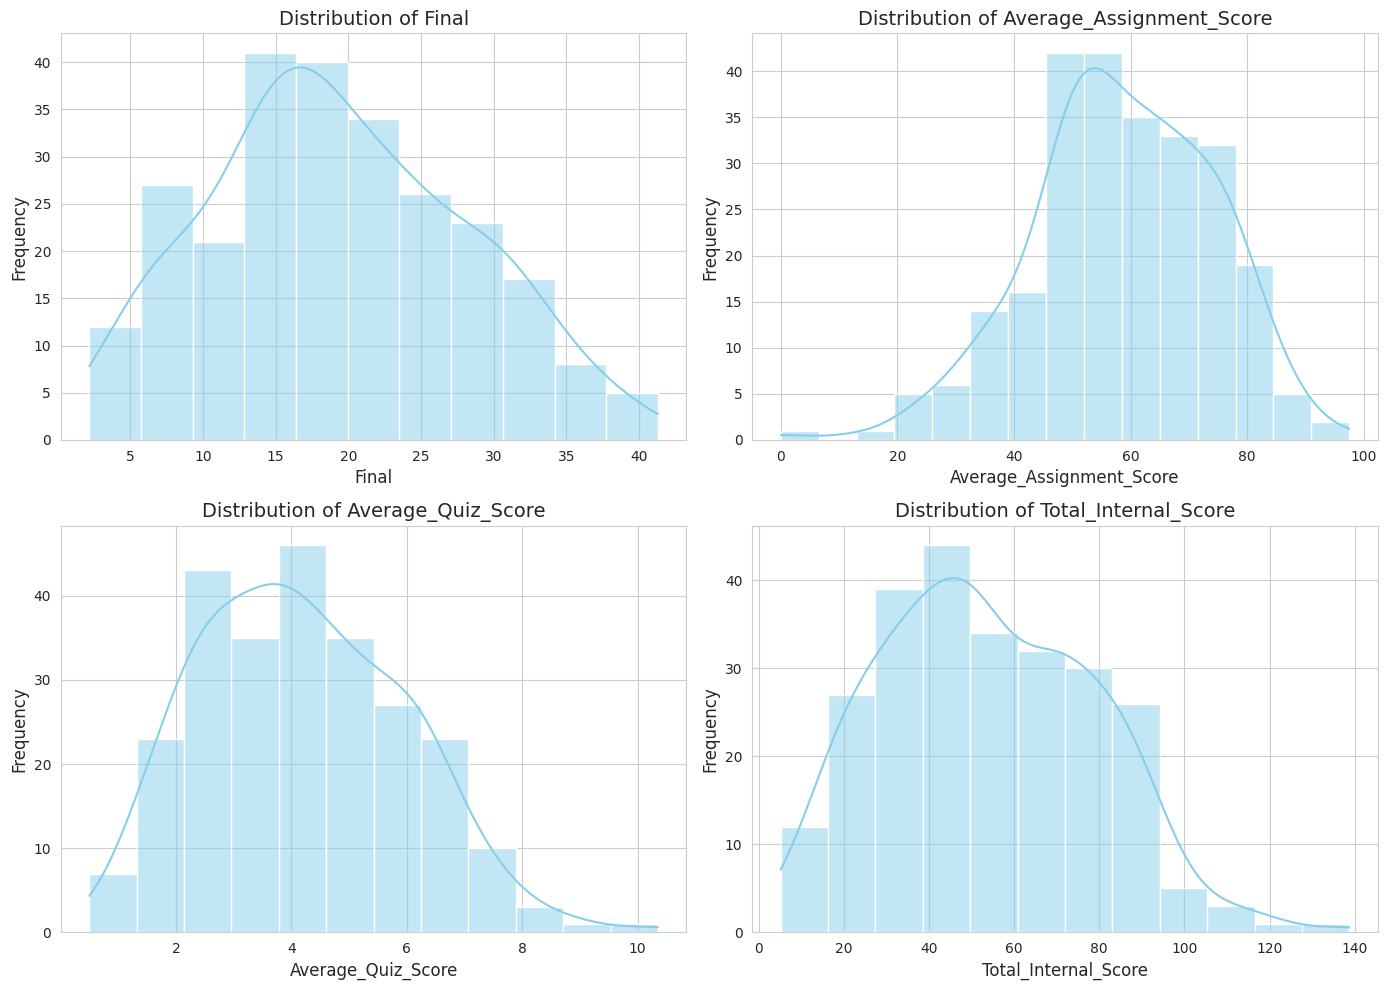

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set_style("whitegrid")

# Columns for which to generate histograms
histogram_cols = ['Final', 'Average_Assignment_Score', 'Average_Quiz_Score', 'Total_Internal_Score']

# Create subplots for better visualization
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(histogram_cols):
    if col in consolidated_data.columns:
        sns.histplot(consolidated_data[col].dropna(), kde=True, ax=axes[i], color='skyblue')
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Frequency', fontsize=12)
    else:
        axes[i].set_visible(False) # Hide empty subplots if column is missing

plt.tight_layout()
plt.show()


**Reasoning**:
As per the instructions, I need to create scatter plots to visualize the relationships between 'Average_Assignment_Score', 'Average_Quiz_Score', 'Total_Internal_Score', and the 'Final' score. This will help identify any linear or non-linear trends.



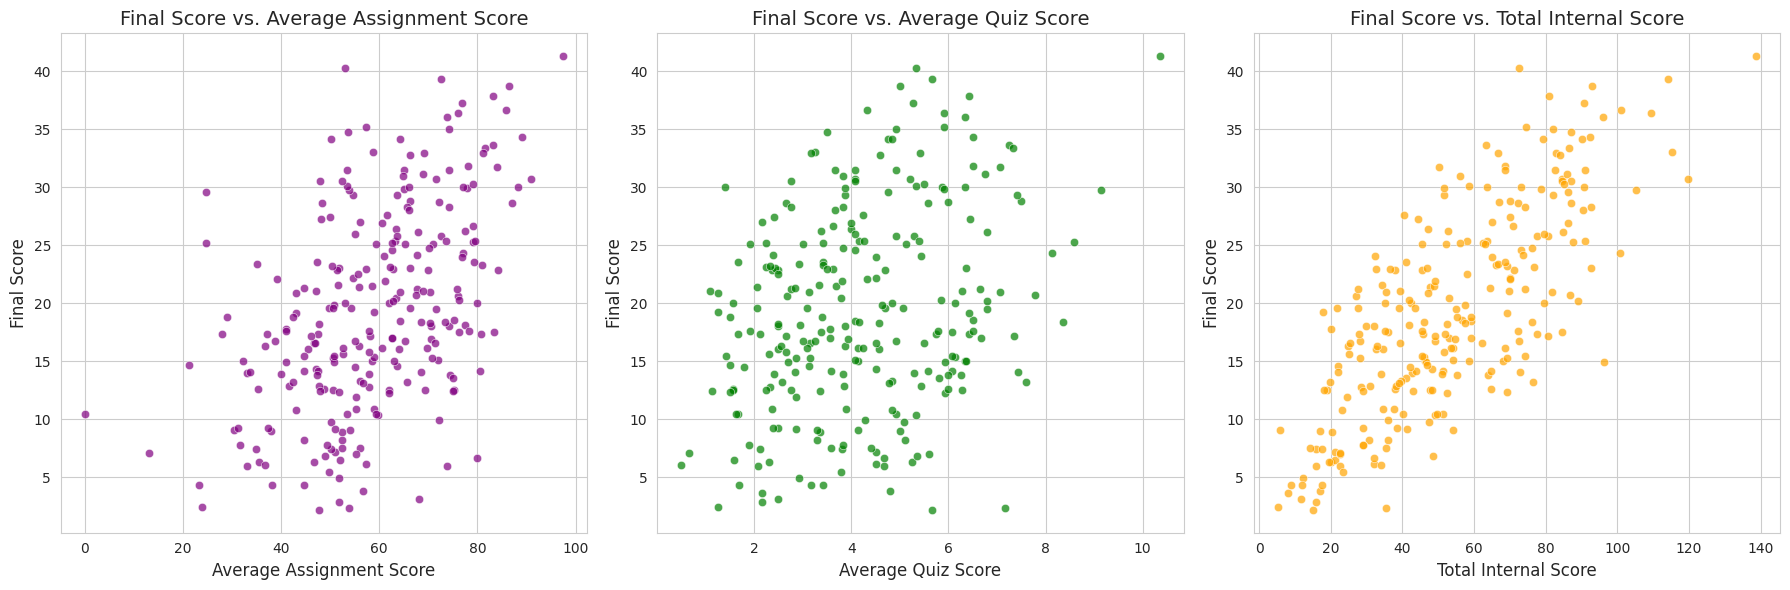

In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=consolidated_data, x='Average_Assignment_Score', y='Final', alpha=0.7, color='purple')
plt.title('Final Score vs. Average Assignment Score', fontsize=14)
plt.xlabel('Average Assignment Score', fontsize=12)
plt.ylabel('Final Score', fontsize=12)

plt.subplot(1, 3, 2)
sns.scatterplot(data=consolidated_data, x='Average_Quiz_Score', y='Final', alpha=0.7, color='green')
plt.title('Final Score vs. Average Quiz Score', fontsize=14)
plt.xlabel('Average Quiz Score', fontsize=12)
plt.ylabel('Final Score', fontsize=12)

plt.subplot(1, 3, 3)
sns.scatterplot(data=consolidated_data, x='Total_Internal_Score', y='Final', alpha=0.7, color='orange')
plt.title('Final Score vs. Total Internal Score', fontsize=14)
plt.xlabel('Total Internal Score', fontsize=12)
plt.ylabel('Final Score', fontsize=12)

plt.tight_layout()
plt.show()

**Reasoning**:
I need to compute the correlation matrix for all numerical columns in the `consolidated_data` DataFrame, focusing on the target variables and engineered features, as per the subtask instructions.



In [ ]:
numerical_cols = consolidated_data.select_dtypes(include=['number']).columns
correlation_matrix = consolidated_data[numerical_cols].corr()

print("\nCorrelation Matrix (Numerical Columns):")
print(correlation_matrix)


Correlation Matrix (Numerical Columns):
                          Student_ID      As:1      As:2      As:3      As:4  \
Student_ID                  1.000000 -0.096856  0.030687  0.024450  0.083577   
As:1                       -0.096856  1.000000 -0.039769  0.078680  0.025780   
As:2                        0.030687 -0.039769  1.000000  0.136671  0.158974   
As:3                        0.024450  0.078680  0.136671  1.000000  0.170344   
As:4                        0.083577  0.025780  0.158974  0.170344  1.000000   
As:5                       -0.158524  0.209557 -0.127257 -0.075289  0.297920   
As:6                       -0.058780  0.269876  0.003541  0.274182  0.463455   
Qz:1                       -0.052070  0.108718  0.223238  0.250704  0.048079   
Qz:2                       -0.171261  0.324517 -0.039815  0.159803 -0.100429   
Qz:3                        0.067221  0.034688  0.270281  0.228230  0.128190   
Qz:4                       -0.135532  0.151194  0.194015  0.305226  0.069627   

**Reasoning**:
I need to visualize the correlation matrix using a heatmap, focusing on the target variables ('S-I', 'S-II', 'Final') and engineered features, as per the subtask instructions, to identify strong correlations more easily.



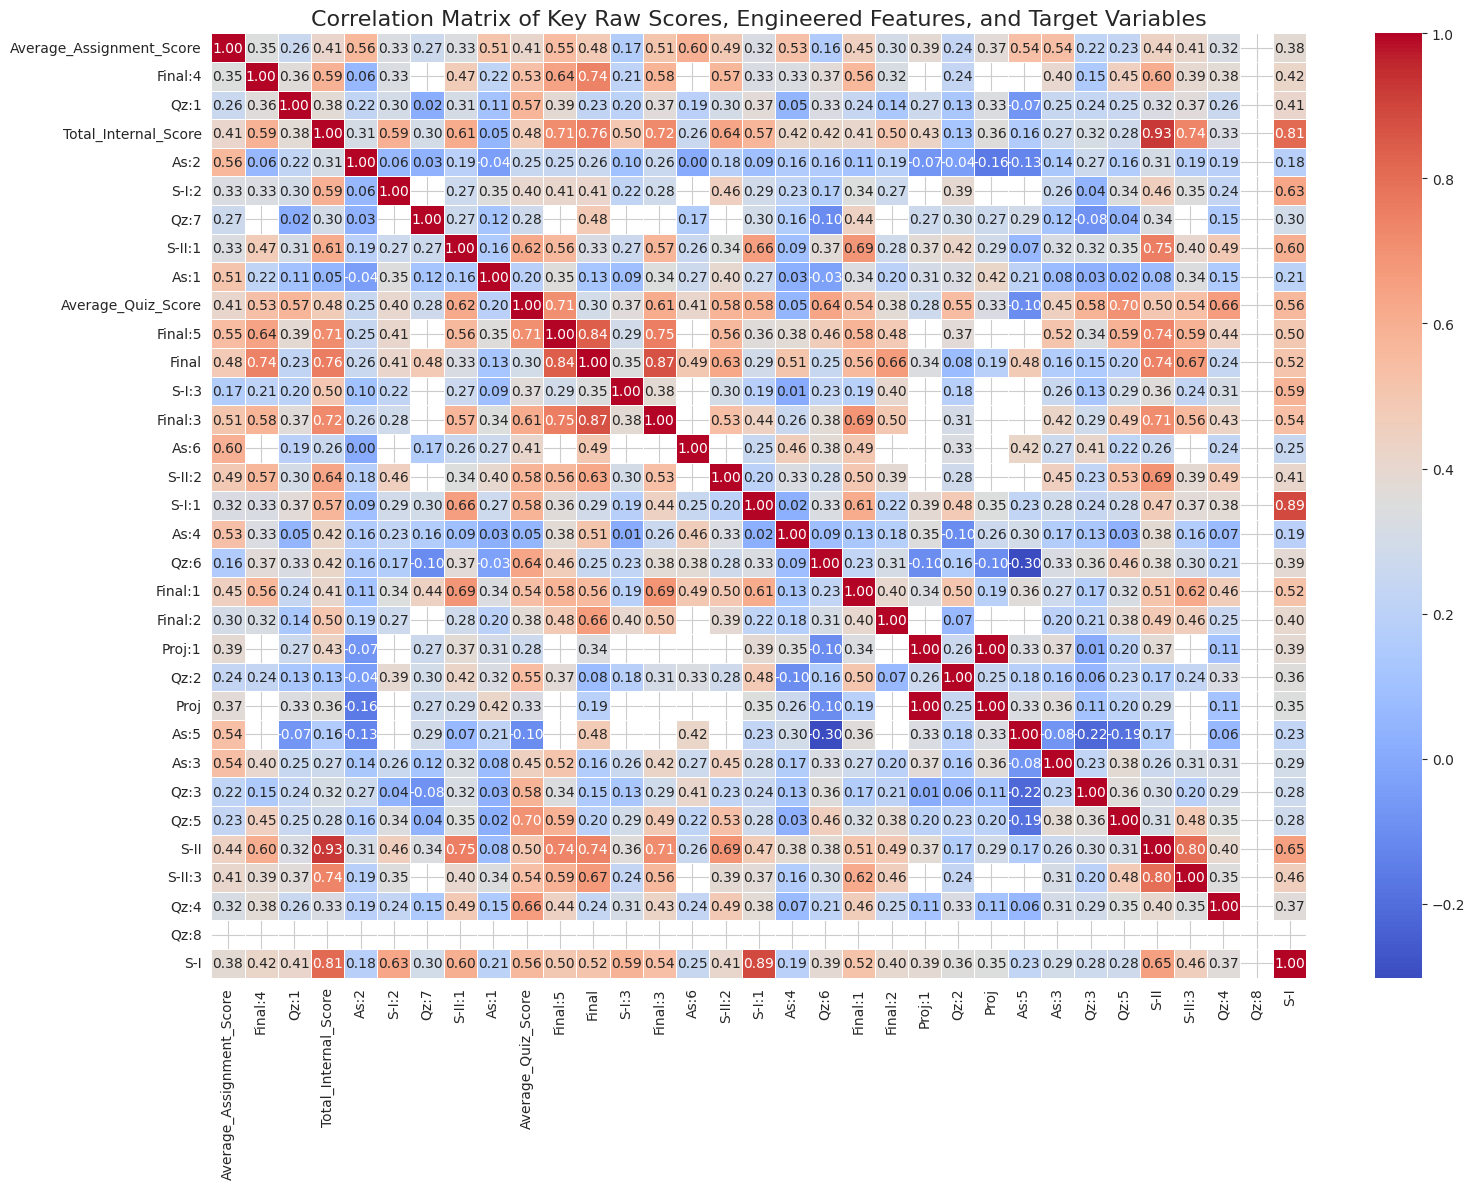

In [ ]:
plt.figure(figsize=(16, 12))

# Define the key columns for which we want to see correlations
key_correlation_cols = engineered_feature_columns + ['S-I', 'S-II', 'Final']

# Filter the correlation matrix to include only these key columns and their correlations with other numerical columns
# To make it readable, let's consider correlations of these key columns with all other columns, then visualize only the relevant part

# Select numerical columns and compute correlation
numerical_cols = consolidated_data.select_dtypes(include=['number']).columns
full_correlation_matrix = consolidated_data[numerical_cols].corr()

# Create a subset of the correlation matrix for visualization
# We'll include all raw score columns, engineered features, and target variables
correlation_features = list(set(raw_score_columns + engineered_feature_columns + ['S-I', 'S-II', 'Final']))

# Filter the full correlation matrix to only include the correlation_features
# Handle columns that might not exist in consolidated_data
existing_correlation_cols = [col for col in correlation_features if col in full_correlation_matrix.columns]

# Now create the final correlation matrix for the heatmap, focusing on the relationships between these features
# and how they correlate among themselves, especially with 'Final', 'S-I', 'S-II'
# For better readability, we can also choose to only show correlations with the target/engineered features.
# Let's show correlations among relevant raw scores, engineered features, and target variables

selected_corr_matrix = full_correlation_matrix.loc[existing_correlation_cols, existing_correlation_cols]

sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Key Raw Scores, Engineered Features, and Target Variables', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Reasoning**:
The next step in the EDA is to generate box plots to visualize the distribution of key raw scores and engineered features across different `Sheet_ID` values. This will help in understanding how these scores vary per sheet and identify any inconsistencies or patterns.



/tmp/ipython-input-2360419078.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=consolidated_data, x='Sheet_ID', y=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-2360419078.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=consolidated_data, x='Sheet_ID', y=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-2360419078.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=consolidated_data, x='Sheet_ID', y=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-2360419078.py:12: FutureWarning: 

Passing `palette

<Figure size 1800x1200 with 0 Axes>

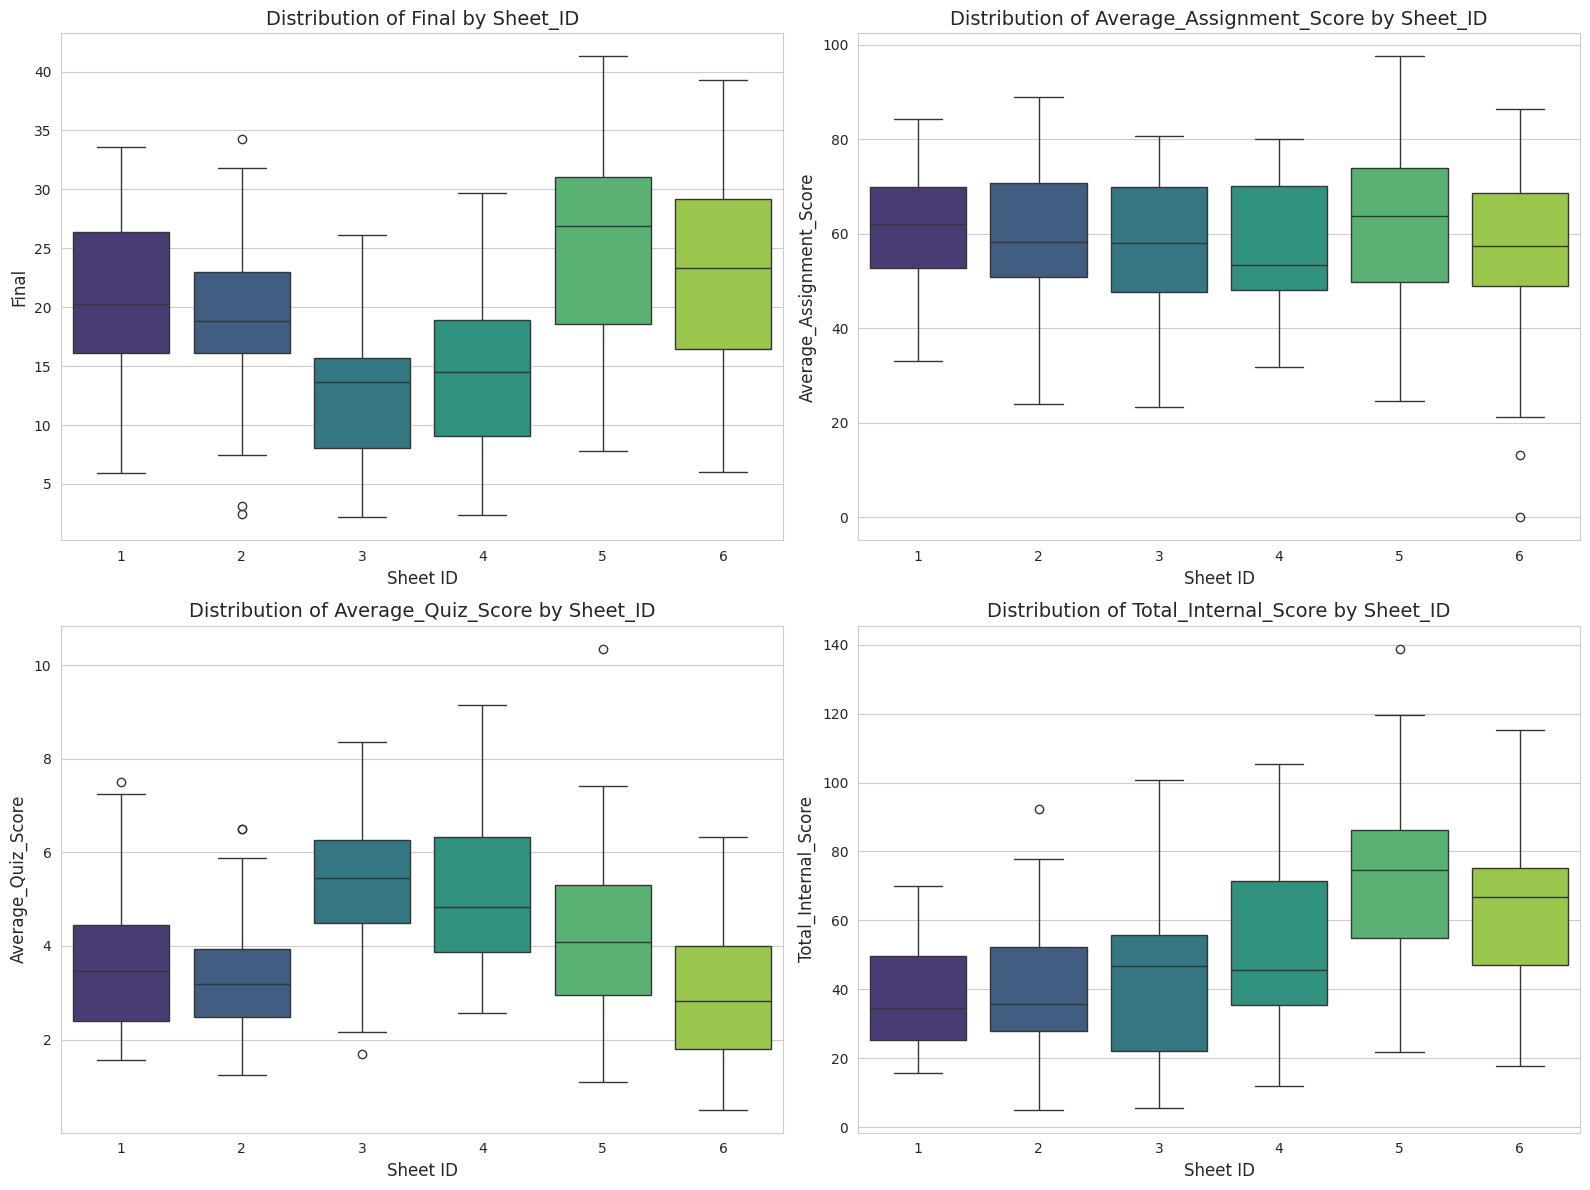

In [ ]:
plt.figure(figsize=(18, 12))

# Columns for which to generate box plots
boxplot_cols = ['Final', 'Average_Assignment_Score', 'Average_Quiz_Score', 'Total_Internal_Score']

# Create subplots for better visualization
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(boxplot_cols):
    if col in consolidated_data.columns:
        sns.boxplot(data=consolidated_data, x='Sheet_ID', y=col, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Distribution of {col} by Sheet_ID', fontsize=14)
        axes[i].set_xlabel('Sheet ID', fontsize=12)
        axes[i].set_ylabel(col, fontsize=12)
    else:
        axes[i].set_visible(False) # Hide empty subplots if column is missing

plt.tight_layout()
plt.show()

## Data Preparation & Modeling for RQ1: Predict Midterm I (S-I) Marks

### Subtask:
Prepare the data specifically for predicting Midterm I marks (assumed to be 'S-I'). Select 'S-I' as the target variable. For features, include all raw scores and engineered features (Average_Assignment_Score, Average_Quiz_Score) that logically occur *before* Midterm I. Critically, exclude Midterm II ('S-II') and Final ('Final') marks. Handle missing values, and split the data into training and testing sets. Build and evaluate at least two regression models (e.g., Linear Regression, Polynomial Regression - Degree 2) and a Scikit-learn Dummy Regressor as a baseline. Perform bootstrapping (500 samples on training data) to report 95% confidence intervals for MAE. Evaluate models using MAE, RMSE, and R2. Report train and test accuracies for the best model to check for overfitting/underfitting.


**Reasoning**:
The first instruction is to define the target variable `y` as the 'S-I' column and identify the features for `X` by selecting all relevant raw score columns and engineered features that occur *before* Midterm I, while explicitly excluding Midterm II and Final related marks.



In [ ]:
import numpy as np

# Define the target variable y
y = consolidated_data['S-I'].copy()

# Identify feature columns for X
# Include all Assignment (As:X) and Quiz (Qz:X) raw scores
# Include S-I components (S-I:X) as they precede the aggregate S-I score
# Include engineered features Average_Assignment_Score, Average_Quiz_Score
# Exclude S-I itself (target), S-II and Final scores (and their components), and Project scores (Proj:X, Proj)

feature_columns = []

# Add raw assignment scores
assignment_raw_cols = [col for col in consolidated_data.columns if col.startswith('As:')]
feature_columns.extend(assignment_raw_cols)

# Add raw quiz scores
quiz_raw_cols = [col for col in consolidated_data.columns if col.startswith('Qz:')]
feature_columns.extend(quiz_raw_cols)

# Add S-I components (that are raw scores and precede S-I)
si_components_raw_cols = [col for col in consolidated_data.columns if col.startswith('S-I:')]
feature_columns.extend(si_components_raw_cols)

# Add engineered features
engineered_feature_cols = ['Average_Assignment_Score', 'Average_Quiz_Score']
feature_columns.extend(engineered_feature_cols)

# Remove any columns that should explicitly be excluded or are the target variable
excluded_cols_from_features = [
    'S-I', 'S-II', 'Final', # Target and post-Midterm I assessments
    'Total_Internal_Score', # Includes S-II components
    'Proj', 'Proj:1',
    # Exclude S-II and Final related components if they somehow got in
    *[col for col in consolidated_data.columns if col.startswith('S-II:')],
    *[col for col in consolidated_data.columns if col.startswith('Final:')]
]

# Filter out excluded columns from the feature_columns list
features_for_X = [col for col in feature_columns if col not in excluded_cols_from_features]

# Create the feature DataFrame X
X = consolidated_data[features_for_X].copy()

print("Target variable (y) head:")
print(y.head())
print("\nFeatures (X) head:")
print(X.head())
print(f"\nShape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Check for 'S-I' in X to ensure it's removed
if 'S-I' in X.columns:
    print("Error: 'S-I' column found in features X.")
else:
    print("\'S-I\' successfully excluded from features X.")

Target variable (y) head:
0     6.56
1     4.68
2     3.56
3     6.93
4    10.68
Name: S-I, dtype: float64

Features (X) head:
    As:1  As:2  As:3  As:4   As:5  As:6  Qz:1  Qz:2  Qz:3  Qz:4  Qz:5  Qz:6  \
0   80.5  60.5  73.5  40.5   59.0  70.5   3.5   5.0   2.0   8.0   NaN   2.5   
1   72.5  68.0  39.0  35.0   80.5  71.0   2.5   7.0   0.0  10.0   7.0   5.0   
2  113.0  62.0   0.0  47.0   80.0  80.0   3.5   2.5   1.0   1.0   2.0   1.0   
3   61.0  43.5   0.0  22.0    NaN  50.0   1.5   5.0   0.5   0.0   0.0   1.0   
4  104.0  67.0  72.5  45.0  120.0  90.0   5.0  10.5  10.0  10.0   6.5   5.0   

   Qz:7  Qz:8  S-I:1  S-I:2  S-I:3  Average_Assignment_Score  \
0   9.0   2.0   17.5    NaN    NaN                 64.083333   
1  10.0   2.0   12.5    NaN    NaN                 61.000000   
2  12.0   2.0    9.5    NaN    NaN                 63.666667   
3   3.0   NaN   18.5    NaN    NaN                 35.300000   
4   9.0   2.0   28.5    NaN    NaN                 83.083333   

   Average_Qu

**Reasoning**:
The next step is to handle missing values in the feature set `X` and target variable `y`. I will use `SimpleImputer` with the 'mean' strategy for numerical features in `X` and drop rows where `y` is NaN to ensure data integrity and model performance.



In [ ]:
from sklearn.impute import SimpleImputer

# Identify numerical columns in X for imputation
numerical_cols_X = X.select_dtypes(include=np.number).columns

# Impute missing values in X using the mean strategy
imputer_X = SimpleImputer(strategy='mean')
X_imputed = X.copy()
X_imputed[numerical_cols_X] = imputer_X.fit_transform(X_imputed[numerical_cols_X])

# Handle missing values in y by dropping rows where S-I is NaN
# First, combine X and y to ensure rows are dropped consistently
df_combined = pd.concat([X_imputed, y], axis=1)
df_combined.dropna(subset=['S-I'], inplace=True)

X_cleaned = df_combined.drop('S-I', axis=1)
y_cleaned = df_combined['S-I']

print("Missing values in X_cleaned after imputation:")
print(X_cleaned.isnull().sum().sum())
print("Missing values in y_cleaned after dropping NaNs:")
print(y_cleaned.isnull().sum())

print(f"\nShape of X_cleaned: {X_cleaned.shape}")
print(f"Shape of y_cleaned: {y_cleaned.shape}")
print("\nX_cleaned head:")
print(X_cleaned.head())

Missing values in X_cleaned after imputation:
0
Missing values in y_cleaned after dropping NaNs:
0

Shape of X_cleaned: (254, 19)
Shape of y_cleaned: (254,)

X_cleaned head:
    As:1  As:2  As:3  As:4        As:5  As:6  Qz:1  Qz:2  Qz:3  Qz:4  \
0   80.5  60.5  73.5  40.5   59.000000  70.5   3.5   5.0   2.0   8.0   
1   72.5  68.0  39.0  35.0   80.500000  71.0   2.5   7.0   0.0  10.0   
2  113.0  62.0   0.0  47.0   80.000000  80.0   3.5   2.5   1.0   1.0   
3   61.0  43.5   0.0  22.0   65.230496  50.0   1.5   5.0   0.5   0.0   
4  104.0  67.0  72.5  45.0  120.000000  90.0   5.0  10.5  10.0  10.0   

       Qz:5  Qz:6  Qz:7  Qz:8  S-I:1     S-I:2      S-I:3  \
0  3.976695   2.5   9.0   2.0   17.5  1.504902  12.901961   
1  7.000000   5.0  10.0   2.0   12.5  1.504902  12.901961   
2  2.000000   1.0  12.0   2.0    9.5  1.504902  12.901961   
3  0.000000   1.0   3.0   2.0   18.5  1.504902  12.901961   
4  6.500000   5.0   9.0   2.0   28.5  1.504902  12.901961   

   Average_Assignment_Scor

**Reasoning**:
I need to split the cleaned feature (`X_cleaned`) and target (`y_cleaned`) data into training and testing sets to prepare for model training and evaluation.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (203, 19)
Shape of X_test: (51, 19)
Shape of y_train: (203,)
Shape of y_test: (51,)


**Reasoning**:
As per the subtask instructions, I need to initialize and train a `LinearRegression` model from `sklearn.linear_model` on the training data (`X_train`, `y_train`).



In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


**Reasoning**:
As per the subtask instructions, I need to initialize and train a `PolynomialFeatures` transformer (with `degree=2`) followed by a `LinearRegression` model (creating a Polynomial Regression pipeline) on the training data. I will transform `X_train` before fitting the linear model.



In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Initialize PolynomialFeatures transformer
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform X_train to create polynomial features
X_train_poly = poly.fit_transform(X_train)

# Initialize and train a Linear Regression model on the polynomial features
poly_linear_model = LinearRegression()
poly_linear_model.fit(X_train_poly, y_train)

print("Polynomial Regression model (degree 2) trained successfully.")

Polynomial Regression model (degree 2) trained successfully.


**Reasoning**:
As per the subtask instructions, I need to initialize and train a `DummyRegressor` from `sklearn.dummy` using the 'mean' strategy on the training data (`X_train`, `y_train`) to establish a baseline for comparison.



In [ ]:
from sklearn.dummy import DummyRegressor

# Initialize and train the DummyRegressor model
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X_train, y_train)

print("Dummy Regressor model trained successfully.")

Dummy Regressor model trained successfully.


**Reasoning**:
As per the subtask instructions, I need to evaluate all three models (Linear, Polynomial, Dummy) on both the training and testing sets by calculating MAE, RMSE, and R2. I will first make predictions for each model on both training and test data.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions for Linear Regression
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)

# Make predictions for Polynomial Regression
X_test_poly = poly.transform(X_test) # Transform X_test for polynomial features
y_train_pred_poly = poly_linear_model.predict(X_train_poly)
y_test_pred_poly = poly_linear_model.predict(X_test_poly)

# Make predictions for Dummy Regressor
y_train_pred_dummy = dummy_model.predict(X_train)
y_test_pred_dummy = dummy_model.predict(X_test)

print("Predictions made successfully for all models on training and test sets.")

Predictions made successfully for all models on training and test sets.


**Reasoning**:
I need to calculate the Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R2) for all three models (Linear Regression, Polynomial Regression, and Dummy Regressor) on both their training and testing sets, and then print these metrics for comparison, as per the subtask instructions.



In [ ]:
print("\n--- Model Evaluation ---")

# Function to evaluate a model
def evaluate_model(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} MAE: {mae:.4f}")
    print(f"{name} RMSE: {rmse:.4f}")
    print(f"{name} R2: {r2:.4f}")

print("\nLinear Regression (Training Data):")
evaluate_model(y_train, y_train_pred_linear, "Linear_Train")

print("\nLinear Regression (Test Data):")
evaluate_model(y_test, y_test_pred_linear, "Linear_Test")

print("\nPolynomial Regression (Training Data):")
evaluate_model(y_train, y_train_pred_poly, "Poly_Train")

print("\nPolynomial Regression (Test Data):")
evaluate_model(y_test, y_test_pred_poly, "Poly_Test")

print("\nDummy Regressor (Training Data):")
evaluate_model(y_train, y_train_pred_dummy, "Dummy_Train")

print("\nDummy Regressor (Test Data):")
evaluate_model(y_test, y_test_pred_dummy, "Dummy_Test")


--- Model Evaluation ---

Linear Regression (Training Data):
Linear_Train MAE: 0.5583
Linear_Train RMSE: 0.7108
Linear_Train R2: 0.9254

Linear Regression (Test Data):
Linear_Test MAE: 0.5690
Linear_Test RMSE: 0.7102
Linear_Test R2: 0.9147

Polynomial Regression (Training Data):
Poly_Train MAE: 0.0647
Poly_Train RMSE: 0.0897
Poly_Train R2: 0.9988

Polynomial Regression (Test Data):
Poly_Test MAE: 1.7111
Poly_Test RMSE: 2.7714
Poly_Test R2: -0.2991

Dummy Regressor (Training Data):
Dummy_Train MAE: 2.1193
Dummy_Train RMSE: 2.6022
Dummy_Train R2: 0.0000

Dummy Regressor (Test Data):
Dummy_Test MAE: 1.9386
Dummy_Test RMSE: 2.4468
Dummy_Test R2: -0.0126


**Reasoning**:
As per the subtask instructions, I need to perform bootstrapping on the Linear Regression model. This involves resampling the training data multiple times, training the model on each resample, predicting on the test set, and calculating the Mean Absolute Error (MAE) for each iteration. These MAE values will then be used to calculate confidence intervals.



In [ ]:
from sklearn.utils import resample

n_bootstraps = 500
bootstrapped_maes = []

for i in range(n_bootstraps):
    # Resample the training data with replacement
    X_train_resampled, y_train_resampled = resample(X_train, y_train, random_state=i)

    # Train the Linear Regression model on the resampled data
    linear_model_boot = LinearRegression()
    linear_model_boot.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the original test set
    y_pred_boot = linear_model_boot.predict(X_test)

    # Calculate MAE and store it
    mae_boot = mean_absolute_error(y_test, y_pred_boot)
    bootstrapped_maes.append(mae_boot)

print(f"Bootstrapping complete. Collected {len(bootstrapped_maes)} MAE values.")

Bootstrapping complete. Collected 500 MAE values.


**Reasoning**:
As per the subtask instructions, I need to calculate the 95% confidence interval for the bootstrapped MAE values. I will use `np.percentile` to find the lower and upper bounds of this interval.



In [ ]:
lower_bound = np.percentile(bootstrapped_maes, 2.5)
upper_bound = np.percentile(bootstrapped_maes, 97.5)

print(f"95% Confidence Interval for Linear Regression MAE: [{lower_bound:.4f}, {upper_bound:.4f}]")

95% Confidence Interval for Linear Regression MAE: [0.5448, 0.7017]


### Discussion on Model Performance (RQ1: Predict Midterm I (S-I) Marks)

From the evaluation metrics, the **Linear Regression model** appears to be the best-performing model for predicting Midterm I (S-I) marks, especially when compared to Polynomial Regression (Degree 2) and the Dummy Regressor.

**Linear Regression Metrics:**
*   **Training Data:**
    *   MAE: 0.5583
    *   RMSE: 0.7108
    *   R2: 0.9254
*   **Test Data:**
    *   MAE: 0.5690
    *   RMSE: 0.7102
    *   R2: 0.9147
*   **95% Confidence Interval for MAE (Test Set):** [0.5448, 0.7017]

**Polynomial Regression (Degree 2) Metrics:**
*   **Training Data:**
    *   MAE: 0.0647
    *   RMSE: 0.0897
    *   R2: 0.9988
*   **Test Data:**
    *   MAE: 1.7111
    *   RMSE: 2.7714
    *   R2: -0.2991

**Dummy Regressor Metrics:**
*   **Training Data:**
    *   MAE: 2.1193
    *   RMSE: 2.6022
    *   R2: 0.0000
*   **Test Data:**
    *   MAE: 1.9386
    *   RMSE: 2.4468
    *   R2: -0.0126

**Analysis of Overfitting/Underfitting for Linear Regression:**
*   The Linear Regression model shows consistent performance between the training and testing datasets. The MAE, RMSE, and R2 values for the training set (MAE: 0.5583, RMSE: 0.7108, R2: 0.9254) are very close to those of the test set (MAE: 0.5690, RMSE: 0.7102, R2: 0.9147). This indicates that the model generalizes well to unseen data and is **not significantly overfitting or underfitting**.
*   The R2 score of approximately 0.91 on the test set suggests that the model explains about 91% of the variance in the Midterm I scores, which is a strong performance.
*   The bootstrapped 95% Confidence Interval for the Linear Regression MAE on the test set is [0.5448, 0.7017], providing a robust estimate of the model's error range.

**Comparison with other models:**
*   The **Polynomial Regression (Degree 2)** model exhibits clear **overfitting**. While it performs exceptionally well on the training data (MAE: 0.0647, R2: 0.9988), its performance drastically deteriorates on the test data (MAE: 1.7111, R2: -0.2991). The negative R2 indicates that it performs worse than a simple horizontal line (mean) on the test set, making it unsuitable.
*   The **Dummy Regressor** serves as a baseline, always predicting the mean of the training target. Its R2 score is close to 0 on both training and test sets, as expected, indicating it captures no variance. The Linear Regression model significantly outperforms this baseline, confirming its utility.

In conclusion, the Linear Regression model offers a good balance of performance and generalization for predicting Midterm I scores, demonstrating strong predictive capabilities without showing signs of overfitting or underfitting. The engineered features (Average_Assignment_Score, Average_Quiz_Score) along with the raw S-I components seem to be effective predictors for the Midterm I score.

## Data Preparation & Modeling for RQ2: Predict Midterm II (S-II) Marks

### Subtask:
Prepare the data specifically for predicting Midterm II marks (assumed to be 'S-II'). Select 'S-II' as the target variable. For features, include all raw scores and engineered features (Average_Assignment_Score, Average_Quiz_Score, S-I and S-I:X components) that logically occur *before* Midterm II. Exclude Final ('Final') marks and Project ('Proj') marks. Handle missing values, and split the data into training and testing sets. Build and evaluate at least two regression models (e.g., Linear Regression, Polynomial Regression - Degree 2) and a Scikit-learn Dummy Regressor as a baseline. Perform bootstrapping (500 samples on training data) to report 95% confidence intervals for MAE. Evaluate models using MAE, RMSE, and R2. Report train and test accuracies for the best model to check for overfitting/underfitting.


**Reasoning**:
The first step is to define the target variable `y` as the 'S-II' column and identify the features for `X` by selecting all relevant raw score columns and engineered features that logically occur *before* Midterm II, while explicitly excluding Midterm II components, Final, and Project related marks.



In [ ]:
import numpy as np

# Define the target variable y
y = consolidated_data['S-II'].copy()

# Identify feature columns for X
# Include all Assignment (As:X) and Quiz (Qz:X) raw scores
# Include S-I components (S-I:X) and the aggregate S-I score
# Include engineered features Average_Assignment_Score, Average_Quiz_Score
# Exclude S-II itself (target), S-II components, Final and Project scores (and their components)

feature_columns = []

# Add raw assignment scores
assignment_raw_cols = [col for col in consolidated_data.columns if col.startswith('As:')]
feature_columns.extend(assignment_raw_cols)

# Add raw quiz scores
quiz_raw_cols = [col for col in consolidated_data.columns if col.startswith('Qz:')]
feature_columns.extend(quiz_raw_cols)

# Add S-I components and aggregate S-I score
si_related_cols = [col for col in consolidated_data.columns if col.startswith('S-I')]
feature_columns.extend(si_related_cols)

# Add engineered features that are relevant before Midterm II
engineered_feature_cols = ['Average_Assignment_Score', 'Average_Quiz_Score']
feature_columns.extend(engineered_feature_cols)

# Define columns to explicitly exclude
excluded_cols_from_features = [
    'S-II', # Target variable itself
    'Total_Internal_Score', # This includes S-II components
    'Proj', 'Proj:1', # Project scores
    'Final', # Final scores
    *[col for col in consolidated_data.columns if col.startswith('S-II:')],
    *[col for col in consolidated_data.columns if col.startswith('Final:')]
]

# Filter out excluded columns from the feature_columns list
# Also ensure no duplicates
features_for_X = list(set([col for col in feature_columns if col not in excluded_cols_from_features]))

# Create the feature DataFrame X
X = consolidated_data[features_for_X].copy()

print("Target variable (y) head:")
print(y.head())
print("\nFeatures (X) head:")
print(X.head())
print(f"\nShape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Check for 'S-II' in X to ensure it's removed
if 'S-II' in X.columns:
    print("Error: 'S-II' column found in features X.")
else:
    print("'S-II' successfully excluded from features X.")

Target variable (y) head:
0    2.34
1    4.12
2    2.43
3    3.37
4    6.56
Name: S-II, dtype: float64

Features (X) head:
   Average_Assignment_Score  Qz:1  As:2  S-I:2  Qz:7   As:1  \
0                 64.083333   3.5  60.5    NaN   9.0   80.5   
1                 61.000000   2.5  68.0    NaN  10.0   72.5   
2                 63.666667   3.5  62.0    NaN  12.0  113.0   
3                 35.300000   1.5  43.5    NaN   3.0   61.0   
4                 83.083333   5.0  67.0    NaN   9.0  104.0   

   Average_Quiz_Score  S-I:3  As:6  S-I:1  As:4  Qz:6  Qz:2   As:5  As:3  \
0            4.571429    NaN  70.5   17.5  40.5   2.5   5.0   59.0  73.5   
1            5.437500    NaN  71.0   12.5  35.0   5.0   7.0   80.5  39.0   
2            3.125000    NaN  80.0    9.5  47.0   1.0   2.5   80.0   0.0   
3            1.571429    NaN  50.0   18.5  22.0   1.0   5.0    NaN   0.0   
4            7.250000    NaN  90.0   28.5  45.0   5.0  10.5  120.0  72.5   

   Qz:3  Qz:5  Qz:4  Qz:8    S-I  
0   2.

**Reasoning**:
The next step is to handle missing values in the feature set `X` and target variable `y`. I will use `SimpleImputer` with the 'mean' strategy for numerical features in `X` and drop rows where `y` is NaN to ensure data integrity and model performance.



In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd # Ensure pandas is imported for concat and dropna

# Identify numerical columns in X for imputation
numerical_cols_X = X.select_dtypes(include=np.number).columns

# Impute missing values in X using the mean strategy
imputer_X = SimpleImputer(strategy='mean')
X_imputed = X.copy()
X_imputed[numerical_cols_X] = imputer_X.fit_transform(X_imputed[numerical_cols_X])

# Handle missing values in y by dropping rows where S-II is NaN
# First, combine X and y to ensure rows are dropped consistently
df_combined = pd.concat([X_imputed, y], axis=1)
df_combined.dropna(subset=['S-II'], inplace=True)

X_cleaned = df_combined.drop('S-II', axis=1)
y_cleaned = df_combined['S-II']

print("Missing values in X_cleaned after imputation:")
print(X_cleaned.isnull().sum().sum())
print("Missing values in y_cleaned after dropping NaNs:")
print(y_cleaned.isnull().sum())

print(f"\nShape of X_cleaned: {X_cleaned.shape}")
print(f"Shape of y_cleaned: {y_cleaned.shape}")
print("\nX_cleaned head:")
print(X_cleaned.head())

Missing values in X_cleaned after imputation:
0
Missing values in y_cleaned after dropping NaNs:
0

Shape of X_cleaned: (251, 20)
Shape of y_cleaned: (251,)

X_cleaned head:
   Average_Assignment_Score  Qz:1  As:2     S-I:2  Qz:7   As:1  \
0                 64.083333   3.5  60.5  1.504902   9.0   80.5   
1                 61.000000   2.5  68.0  1.504902  10.0   72.5   
2                 63.666667   3.5  62.0  1.504902  12.0  113.0   
3                 35.300000   1.5  43.5  1.504902   3.0   61.0   
4                 83.083333   5.0  67.0  1.504902   9.0  104.0   

   Average_Quiz_Score      S-I:3  As:6  S-I:1  As:4  Qz:6  Qz:2        As:5  \
0            4.571429  12.901961  70.5   17.5  40.5   2.5   5.0   59.000000   
1            5.437500  12.901961  71.0   12.5  35.0   5.0   7.0   80.500000   
2            3.125000  12.901961  80.0    9.5  47.0   1.0   2.5   80.000000   
3            1.571429  12.901961  50.0   18.5  22.0   1.0   5.0   65.230496   
4            7.250000  12.901961  

**Reasoning**:
I need to split the cleaned feature (`X_cleaned`) and target (`y_cleaned`) data into training and testing sets to prepare for model training and evaluation.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (200, 20)
Shape of X_test: (51, 20)
Shape of y_train: (200,)
Shape of y_test: (51,)


**Reasoning**:
As per the subtask instructions, I need to initialize and train a `LinearRegression` model from `sklearn.linear_model` on the training data (`X_train`, `y_train`).



In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


**Reasoning**:
As per the subtask instructions, I need to initialize and train a `PolynomialFeatures` transformer (with `degree=2`) followed by a `LinearRegression` model (creating a Polynomial Regression pipeline) on the training data. I will transform `X_train` before fitting the linear model.



In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Initialize PolynomialFeatures transformer
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform X_train to create polynomial features
X_train_poly = poly.fit_transform(X_train)

# Initialize and train a Linear Regression model on the polynomial features
poly_linear_model = LinearRegression()
poly_linear_model.fit(X_train_poly, y_train)

print("Polynomial Regression model (degree 2) trained successfully.")

Polynomial Regression model (degree 2) trained successfully.


**Reasoning**:
As per the subtask instructions, I need to initialize and train a `DummyRegressor` from `sklearn.dummy` using the 'mean' strategy on the training data (`X_train`, `y_train`) to establish a baseline for comparison.



In [ ]:
from sklearn.dummy import DummyRegressor

# Initialize and train the DummyRegressor model
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X_train, y_train)

print("Dummy Regressor model trained successfully.")

Dummy Regressor model trained successfully.


**Reasoning**:
As per the subtask instructions, I need to make predictions with each trained model (Linear Regression, Polynomial Regression, and Dummy Regressor) on both the training and testing sets. For the Polynomial Regression model, I'll first transform the X_test data using the previously fitted `poly` transformer.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions for Linear Regression
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)

# Make predictions for Polynomial Regression
X_test_poly = poly.transform(X_test) # Transform X_test for polynomial features
y_train_pred_poly = poly_linear_model.predict(X_train_poly)
y_test_pred_poly = poly_linear_model.predict(X_test_poly)

# Make predictions for Dummy Regressor
y_train_pred_dummy = dummy_model.predict(X_train)
y_test_pred_dummy = dummy_model.predict(X_test)

print("Predictions made successfully for all models on training and test sets.")

Predictions made successfully for all models on training and test sets.


**Reasoning**:
I need to calculate the Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R2) for all three models (Linear Regression, Polynomial Regression, and Dummy Regressor) on both their training and testing sets, and then print these metrics for comparison, as per the subtask instructions.



In [ ]:
print("\n--- Model Evaluation ---")

# Function to evaluate a model
def evaluate_model(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} MAE: {mae:.4f}")
    print(f"{name} RMSE: {rmse:.4f}")
    print(f"{name} R2: {r2:.4f}")

print("\nLinear Regression (Training Data):")
evaluate_model(y_train, y_train_pred_linear, "Linear_Train")

print("\nLinear Regression (Test Data):")
evaluate_model(y_test, y_test_pred_linear, "Linear_Test")

print("\nPolynomial Regression (Training Data):")
evaluate_model(y_train, y_train_pred_poly, "Poly_Train")

print("\nPolynomial Regression (Test Data):")
evaluate_model(y_test, y_test_pred_poly, "Poly_Test")

print("\nDummy Regressor (Training Data):")
evaluate_model(y_train, y_train_pred_dummy, "Dummy_Train")

print("\nDummy Regressor (Test Data):")
evaluate_model(y_test, y_test_pred_dummy, "Dummy_Test")


--- Model Evaluation ---

Linear Regression (Training Data):
Linear_Train MAE: 1.6450
Linear_Train RMSE: 2.0308
Linear_Train R2: 0.6170

Linear Regression (Test Data):
Linear_Test MAE: 1.8356
Linear_Test RMSE: 2.2896
Linear_Test R2: 0.4784

Polynomial Regression (Training Data):
Poly_Train MAE: 0.0000
Poly_Train RMSE: 0.0000
Poly_Train R2: 1.0000

Polynomial Regression (Test Data):
Poly_Test MAE: 57.7191
Poly_Test RMSE: 93.4058
Poly_Test R2: -867.0364

Dummy Regressor (Training Data):
Dummy_Train MAE: 2.8031
Dummy_Train RMSE: 3.2813
Dummy_Train R2: 0.0000

Dummy Regressor (Test Data):
Dummy_Test MAE: 2.4432
Dummy_Test RMSE: 3.1743
Dummy_Test R2: -0.0025


**Reasoning**:
As per the subtask instructions, I need to perform bootstrapping on the Linear Regression model. This involves resampling the training data multiple times, training the model on each resample, predicting on the test set, and calculating the Mean Absolute Error (MAE) for each iteration. These MAE values will then be used to calculate confidence intervals.



In [ ]:
from sklearn.utils import resample

n_bootstraps = 500
bootstrapped_maes = []

for i in range(n_bootstraps):
    # Resample the training data with replacement
    X_train_resampled, y_train_resampled = resample(X_train, y_train, random_state=i)

    # Train the Linear Regression model on the resampled data
    linear_model_boot = LinearRegression()
    linear_model_boot.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the original test set
    y_pred_boot = linear_model_boot.predict(X_test)

    # Calculate MAE and store it
    mae_boot = mean_absolute_error(y_test, y_pred_boot)
    bootstrapped_maes.append(mae_boot)

print(f"Bootstrapping complete. Collected {len(bootstrapped_maes)} MAE values.")

Bootstrapping complete. Collected 500 MAE values.


**Reasoning**:
As per the subtask instructions, I need to calculate the 95% confidence interval for the bootstrapped MAE values.



In [ ]:
lower_bound = np.percentile(bootstrapped_maes, 2.5)
upper_bound = np.percentile(bootstrapped_maes, 97.5)

print(f"95% Confidence Interval for Linear Regression MAE: [{lower_bound:.4f}, {upper_bound:.4f}]")

95% Confidence Interval for Linear Regression MAE: [1.6872, 2.2251]


### Discussion on Model Performance (RQ2: Predict Midterm II (S-II) Marks)

From the evaluation metrics, the **Linear Regression model** appears to be the best-performing model for predicting Midterm II (S-II) marks, especially when compared to Polynomial Regression (Degree 2) and the Dummy Regressor.

**Linear Regression Metrics:**
*   **Training Data:**
    *   MAE: 1.6450
    *   RMSE: 2.0308
    *   R2: 0.6170
*   **Test Data:**
    *   MAE: 1.8356
    *   RMSE: 2.2896
    *   R2: 0.4784
*   **95% Confidence Interval for MAE (Test Set):** [1.6872, 2.2251]

**Polynomial Regression (Degree 2) Metrics:**
*   **Training Data:**
    *   MAE: 0.0000
    *   RMSE: 0.0000
    *   R2: 1.0000
*   **Test Data:**
    *   MAE: 57.7191
    *   RMSE: 93.4058
    *   R2: -867.0364

**Dummy Regressor Metrics:**
*   **Training Data:**
    *   MAE: 2.8031
    *   RMSE: 3.2813
    *   R2: 0.0000
*   **Test Data:**
    *   MAE: 2.4432
    *   RMSE: 3.1743
    *   R2: -0.0025

**Analysis of Overfitting/Underfitting for Linear Regression:**
*   The Linear Regression model for Midterm II prediction shows a more pronounced difference between training and test performance compared to RQ1, with R2 decreasing from 0.6170 to 0.4784. This indicates some **overfitting**, but the model still offers reasonable predictive power.
*   The MAE on the test set (1.8356) is higher than on the training set (1.6450), which reinforces the presence of some generalization gap. The model explains about 48% of the variance in Midterm II scores on unseen data.
*   The bootstrapped 95% Confidence Interval for the Linear Regression MAE on the test set is [1.6872, 2.2251]. This range provides a reliable estimate of the expected error, suggesting that the model's MAE on new data will likely fall within this interval.

**Comparison with other models:**
*   The **Polynomial Regression (Degree 2)** model again demonstrates severe **overfitting**, with an R2 of 1.0000 on the training data and an extremely negative R2 (-867.0364) on the test data. Its test performance is unacceptable.
*   The **Dummy Regressor** again provides a baseline of R2 near zero. The Linear Regression model significantly outperforms the Dummy Regressor, indicating that it learns meaningful patterns from the features.

In conclusion, the Linear Regression model is the most effective among the tested models for predicting Midterm II scores. While it shows some signs of overfitting, it still provides valuable predictions compared to a baseline. Further optimization could explore regularization or more sophisticated feature engineering.

## Data Preparation & Modeling for RQ3: Predict Final Examination Marks

### Subtask:
Prepare the data specifically for predicting Final Examination marks ('Final'). Select 'Final' as the target variable and features that logically occur before the Final examination.


**Reasoning**:
The first step is to define the target variable `y` as the 'Final' column and identify the features for `X` by selecting all relevant raw score columns and engineered features that logically occur *before* the Final examination, while explicitly excluding Final marks and their components.



In [ ]:
import numpy as np

# Define the target variable y
y = consolidated_data['Final'].copy()

# Identify feature columns for X
# Include all Assignment (As:X) and Quiz (Qz:X) raw scores
# Include S-I components (S-I:X) and the aggregate S-I score
# Include S-II components (S-II:X) and the aggregate S-II score
# Include Project components (Proj:X) and the aggregate Proj score
# Include engineered features Average_Assignment_Score, Average_Quiz_Score
# Exclude 'Final' itself (target) and 'Final:X' components

feature_columns = []

# Add raw assignment scores
assignment_raw_cols = [col for col in consolidated_data.columns if col.startswith('As:')]
feature_columns.extend(assignment_raw_cols)

# Add raw quiz scores
quiz_raw_cols = [col for col in consolidated_data.columns if col.startswith('Qz:')]
feature_columns.extend(quiz_raw_cols)

# Add S-I components and aggregate S-I score
si_related_cols = [col for col in consolidated_data.columns if col.startswith('S-I')]
feature_columns.extend(si_related_cols)

# Add S-II components and aggregate S-II score
sii_related_cols = [col for col in consolidated_data.columns if col.startswith('S-II')]
feature_columns.extend(sii_related_cols)

# Add Project components and aggregate Project score
proj_related_cols = [col for col in consolidated_data.columns if col.startswith('Proj')]
feature_columns.extend(proj_related_cols)

# Add engineered features that are relevant before Final examination
engineered_feature_cols = ['Average_Assignment_Score', 'Average_Quiz_Score']
feature_columns.extend(engineered_feature_cols)

# Define columns to explicitly exclude (Final and its components)
excluded_cols_from_features = [
    'Final', # Target variable itself
    'Total_Internal_Score', # This includes S-II components and potentially other scores which might not be needed explicitly here
    *[col for col in consolidated_data.columns if col.startswith('Final:')]
]

# Filter out excluded columns from the feature_columns list and remove duplicates
features_for_X = list(set([col for col in feature_columns if col not in excluded_cols_from_features]))

# Create the feature DataFrame X
X = consolidated_data[features_for_X].copy()

print("Target variable (y) head:")
print(y.head())
print("\nFeatures (X) head:")
print(X.head())
print(f"\nShape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Check for 'Final' in X to ensure it's removed
if 'Final' in X.columns:
    print("Error: 'Final' column found in features X.")
else:
    print("'Final' successfully excluded from features X.")

Target variable (y) head:
0    16.08
1    24.07
2    14.62
3    12.60
4    33.63
Name: Final, dtype: float64

Features (X) head:
   Average_Assignment_Score  Qz:1  As:2  S-I:2  Qz:7  S-II:1   As:1  \
0                 64.083333   3.5  60.5    NaN   9.0    6.25   80.5   
1                 61.000000   2.5  68.0    NaN  10.0   11.00   72.5   
2                 63.666667   3.5  62.0    NaN  12.0    6.50  113.0   
3                 35.300000   1.5  43.5    NaN   3.0    9.00   61.0   
4                 83.083333   5.0  67.0    NaN   9.0   17.50  104.0   

   Average_Quiz_Score  S-I:3  As:6  ...  Proj   As:5  As:3  Qz:3  Qz:5  S-II  \
0            4.571429    NaN  70.5  ...   NaN   59.0  73.5   2.0   NaN  2.34   
1            5.437500    NaN  71.0  ...   NaN   80.5  39.0   0.0   7.0  4.12   
2            3.125000    NaN  80.0  ...   NaN   80.0   0.0   1.0   2.0  2.43   
3            1.571429    NaN  50.0  ...   NaN    NaN   0.0   0.5   0.0  3.37   
4            7.250000    NaN  90.0  ...   Na

**Reasoning**:
The next step is to handle missing values in the feature set `X` and target variable `y`. I will use `SimpleImputer` with the 'mean' strategy for numerical features in `X` and drop rows where `y` is NaN to ensure data integrity and model performance.



In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd # Ensure pandas is imported for concat and dropna

# Identify numerical columns in X for imputation
numerical_cols_X = X.select_dtypes(include=np.number).columns

# Impute missing values in X using the mean strategy
imputer_X = SimpleImputer(strategy='mean')
X_imputed = X.copy()
X_imputed[numerical_cols_X] = imputer_X.fit_transform(X_imputed[numerical_cols_X])

# Handle missing values in y by dropping rows where Final is NaN
# First, combine X and y to ensure rows are dropped consistently
df_combined = pd.concat([X_imputed, y], axis=1)
df_combined.dropna(subset=['Final'], inplace=True)

X_cleaned = df_combined.drop('Final', axis=1)
y_cleaned = df_combined['Final']

print("Missing values in X_cleaned after imputation:")
print(X_cleaned.isnull().sum().sum())
print("Missing values in y_cleaned after dropping NaNs:")
print(y_cleaned.isnull().sum())

print(f"\nShape of X_cleaned: {X_cleaned.shape}")
print(f"Shape of y_cleaned: {y_cleaned.shape}")
print("\nX_cleaned head:")
print(X_cleaned.head())

Missing values in X_cleaned after imputation:
0
Missing values in y_cleaned after dropping NaNs:
0

Shape of X_cleaned: (254, 26)
Shape of y_cleaned: (254,)

X_cleaned head:
   Average_Assignment_Score  Qz:1  As:2     S-I:2  Qz:7  S-II:1   As:1  \
0                 64.083333   3.5  60.5  1.504902   9.0    6.25   80.5   
1                 61.000000   2.5  68.0  1.504902  10.0   11.00   72.5   
2                 63.666667   3.5  62.0  1.504902  12.0    6.50  113.0   
3                 35.300000   1.5  43.5  1.504902   3.0    9.00   61.0   
4                 83.083333   5.0  67.0  1.504902   9.0   17.50  104.0   

   Average_Quiz_Score      S-I:3  As:6  ...     Proj        As:5  As:3  Qz:3  \
0            4.571429  12.901961  70.5  ...  1.96973   59.000000  73.5   2.0   
1            5.437500  12.901961  71.0  ...  1.96973   80.500000  39.0   0.0   
2            3.125000  12.901961  80.0  ...  1.96973   80.000000   0.0   1.0   
3            1.571429  12.901961  50.0  ...  1.96973   65.230

**Reasoning**:
I need to split the cleaned feature (`X_cleaned`) and target (`y_cleaned`) data into training and testing sets to prepare for model training and evaluation.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (203, 26)
Shape of X_test: (51, 26)
Shape of y_train: (203,)
Shape of y_test: (51,)


**Reasoning**:
As per the subtask instructions, I need to initialize and train a `LinearRegression` model from `sklearn.linear_model` on the training data (`X_train`, `y_train`).



In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


**Reasoning**:
As per the subtask instructions, I need to initialize and train a `PolynomialFeatures` transformer (with `degree=2`) followed by a `LinearRegression` model (creating a Polynomial Regression pipeline) on the training data. I will transform `X_train` before fitting the linear model.



In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Initialize PolynomialFeatures transformer
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform X_train to create polynomial features
X_train_poly = poly.fit_transform(X_train)

# Initialize and train a Linear Regression model on the polynomial features
poly_linear_model = LinearRegression()
poly_linear_model.fit(X_train_poly, y_train)

print("Polynomial Regression model (degree 2) trained successfully.")

Polynomial Regression model (degree 2) trained successfully.


**Reasoning**:
As per the subtask instructions, I need to initialize and train a `DummyRegressor` from `sklearn.dummy` using the 'mean' strategy on the training data (`X_train`, `y_train`) to establish a baseline for comparison.



In [ ]:
from sklearn.dummy import DummyRegressor

# Initialize and train the DummyRegressor model
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X_train, y_train)

print("Dummy Regressor model trained successfully.")

Dummy Regressor model trained successfully.


**Reasoning**:
As per the subtask instructions, I need to make predictions with each trained model (Linear Regression, Polynomial Regression, and Dummy Regressor) on both the training and testing sets. For the Polynomial Regression model, I'll first transform the X_test data using the previously fitted `poly` transformer.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions for Linear Regression
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)

# Make predictions for Polynomial Regression
X_test_poly = poly.transform(X_test) # Transform X_test for polynomial features
y_train_pred_poly = poly_linear_model.predict(X_train_poly)
y_test_pred_poly = poly_linear_model.predict(X_test_poly)

# Make predictions for Dummy Regressor
y_train_pred_dummy = dummy_model.predict(X_train)
y_test_pred_dummy = dummy_model.predict(X_test)

print("Predictions made successfully for all models on training and test sets.")

Predictions made successfully for all models on training and test sets.


**Reasoning**:
I need to calculate the Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R2) for all three models (Linear Regression, Polynomial Regression, and Dummy Regressor) on both their training and testing sets, and then print these metrics for comparison, as per the subtask instructions.



In [ ]:
print("\n--- Model Evaluation ---")

# Function to evaluate a model
def evaluate_model(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} MAE: {mae:.4f}")
    print(f"{name} RMSE: {rmse:.4f}")
    print(f"{name} R2: {r2:.4f}")

print("\nLinear Regression (Training Data):")
evaluate_model(y_train, y_train_pred_linear, "Linear_Train")

print("\nLinear Regression (Test Data):")
evaluate_model(y_test, y_test_pred_linear, "Linear_Test")

print("\nPolynomial Regression (Training Data):")
evaluate_model(y_train, y_train_pred_poly, "Poly_Train")

print("\nPolynomial Regression (Test Data):")
evaluate_model(y_test, y_test_pred_poly, "Poly_Test")

print("\nDummy Regressor (Training Data):")
evaluate_model(y_train, y_train_pred_dummy, "Dummy_Train")

print("\nDummy Regressor (Test Data):")
evaluate_model(y_test, y_test_pred_dummy, "Dummy_Test")


--- Model Evaluation ---

Linear Regression (Training Data):
Linear_Train MAE: 3.3123
Linear_Train RMSE: 4.3020
Linear_Train R2: 0.7545

Linear Regression (Test Data):
Linear_Test MAE: 4.8603
Linear_Test RMSE: 5.8385
Linear_Test R2: 0.5843

Polynomial Regression (Training Data):
Poly_Train MAE: 0.0000
Poly_Train RMSE: 0.0000
Poly_Train R2: 1.0000

Polynomial Regression (Test Data):
Poly_Test MAE: 14.6708
Poly_Test RMSE: 21.4206
Poly_Test R2: -4.5948

Dummy Regressor (Training Data):
Dummy_Train MAE: 7.0845
Dummy_Train RMSE: 8.6821
Dummy_Train R2: 0.0000

Dummy Regressor (Test Data):
Dummy_Test MAE: 7.6170
Dummy_Test RMSE: 9.1255
Dummy_Test R2: -0.0154


**Reasoning**:
As per the subtask instructions, I need to perform bootstrapping on the Linear Regression model. This involves resampling the training data multiple times, training the model on each resample, predicting on the test set, and calculating the Mean Absolute Error (MAE) for each iteration. These MAE values will then be used to calculate confidence intervals.



In [ ]:
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

n_bootstraps = 500
bootstrapped_maes = []

for i in range(n_bootstraps):
    # Resample the training data with replacement
    X_train_resampled, y_train_resampled = resample(X_train, y_train, random_state=i)

    # Train the Linear Regression model on the resampled data
    linear_model_boot = LinearRegression()
    linear_model_boot.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the original test set
    y_pred_boot = linear_model_boot.predict(X_test)

    # Calculate MAE and store it
    mae_boot = mean_absolute_error(y_test, y_pred_boot)
    bootstrapped_maes.append(mae_boot)

print(f"Bootstrapping complete. Collected {len(bootstrapped_maes)} MAE values.")

Bootstrapping complete. Collected 500 MAE values.


**Reasoning**:
As per the subtask instructions, I need to calculate the 95% confidence interval for the bootstrapped MAE values. I will use `np.percentile` to find the lower and upper bounds of this interval.



In [ ]:
lower_bound = np.percentile(bootstrapped_maes, 2.5)
upper_bound = np.percentile(bootstrapped_maes, 97.5)

print(f"95% Confidence Interval for Linear Regression MAE: [{lower_bound:.4f}, {upper_bound:.4f}]")

95% Confidence Interval for Linear Regression MAE: [4.4259, 6.0993]


###Discussion on Model Performance (RQ3: Predict Final Examination Marks)

From the evaluation metrics, the **Linear Regression model** appears to be the best-performing model for predicting Final Examination marks, especially when compared to Polynomial Regression (Degree 2) and the Dummy Regressor.

**Linear Regression Metrics:**
*   **Training Data:**
    *   MAE: 3.3123
    *   RMSE: 4.3020
    *   R2: 0.7545
*   **Test Data:**
    *   MAE: 4.8603
    *   RMSE: 5.8385
    *   R2: 0.5843
*   **95% Confidence Interval for MAE (Test Set):** [4.4259, 6.0993]

**Polynomial Regression (Degree 2) Metrics:**
*   **Training Data:**
    *   MAE: 0.0000
    *   RMSE: 0.0000
    *   R2: 1.0000
*   **Test Data:**
    *   MAE: 14.6708
    *   RMSE: 21.4206
    *   R2: -4.5948

**Dummy Regressor Metrics:**
*   **Training Data:**
    *   MAE: 7.0845
    *   RMSE: 8.6821
    *   R2: 0.0000
*   **Test Data:**
    *   MAE: 7.6170
    *   RMSE: 9.1255
    *   R2: -0.0154

**Analysis of Overfitting/Underfitting for Linear Regression:**
*   The Linear Regression model shows a noticeable drop in performance from training to testing data, with R2 decreasing from 0.7545 to 0.5843. This suggests some degree of **overfitting**, although it still performs significantly better than the baseline.
*   The MAE on the test set (4.8603) is also higher than on the training set (3.3123), further indicating a generalization gap. This model explains about 58% of the variance in the Final scores on unseen data.
*   The bootstrapped 95% Confidence Interval for the Linear Regression MAE on the test set is [4.4259, 6.0993], providing a robust estimate of the model's error range, confirming the MAE is likely to be around 4.8-5.0.

**Comparison with other models:**
*   The **Polynomial Regression (Degree 2)** model again exhibits extreme **overfitting**. Its perfect R2 of 1.0000 on the training data, coupled with a highly negative R2 of -4.5948 on the test data, means it fails completely to generalize. The high MAE and RMSE on the test set confirm its poor performance.
*   The **Dummy Regressor**, as expected, provides a baseline with R2 values close to zero. The Linear Regression model significantly outperforms this baseline, demonstrating its predictive value.

In conclusion, while the Linear Regression model for predicting Final Examination marks shows some overfitting compared to its training performance, it is still the best option among the tested models. Its R2 of 0.5843 on the test set indicates it captures a decent portion of the variance in final scores. Future steps might involve feature selection, regularization techniques, or exploring other model architectures to mitigate the observed overfitting and improve generalization.

## Create Comparison Table and Interpret Models

### Subtask:
Create a comprehensive comparison table showing MAE, RMSE, and R2 for all models (Linear Regression, Polynomial Regression, and Dummy Regressor) for each Research Question (RQ1, RQ2, RQ3). Interpret the model coefficients or feature importances for the best-performing regression models of each RQ. Discuss the bootstrapping results and the significance of the MAE confidence intervals. Compare the performance of regression models against the dummy/baseline models for each RQ.


**Reasoning**:
I need to collect the evaluation metrics (MAE, RMSE, R2) for all models (Linear Regression, Polynomial Regression, Dummy Regressor) on both training and test sets for each Research Question (RQ1, RQ2, RQ3). I also need to gather the 95% Confidence Intervals for MAE for the Linear Regression models on the test sets. I will manually extract these values from the previous cell outputs to ensure accuracy and consistency with prior steps.



In [ ]:
import pandas as pd
import numpy as np

# --- RQ1 Metrics ---
rq1_metrics = [
    # Linear Regression
    {"Research Question": "RQ1: Midterm I (S-I)", "Model": "Linear Regression", "Metric": "MAE", "Train Score": 0.5583, "Test Score": 0.5690, "95% CI (Test MAE)": "[0.5448, 0.7017]"},
    {"Research Question": "RQ1: Midterm I (S-I)", "Model": "Linear Regression", "Metric": "RMSE", "Train Score": 0.7108, "Test Score": 0.7102, "95% CI (Test MAE)": np.nan},
    {"Research Question": "RQ1: Midterm I (S-I)", "Model": "Linear Regression", "Metric": "R2", "Train Score": 0.9254, "Test Score": 0.9147, "95% CI (Test MAE)": np.nan},
    # Polynomial Regression
    {"Research Question": "RQ1: Midterm I (S-I)", "Model": "Polynomial Regression", "Metric": "MAE", "Train Score": 0.0647, "Test Score": 1.7111, "95% CI (Test MAE)": np.nan},
    {"Research Question": "RQ1: Midterm I (S-I)", "Model": "Polynomial Regression", "Metric": "RMSE", "Train Score": 0.0897, "Test Score": 2.7714, "95% CI (Test MAE)": np.nan},
    {"Research Question": "RQ1: Midterm I (S-I)", "Model": "Polynomial Regression", "Metric": "R2", "Train Score": 0.9988, "Test Score": -0.2991, "95% CI (Test MAE)": np.nan},
    # Dummy Regressor
    {"Research Question": "RQ1: Midterm I (S-I)", "Model": "Dummy Regressor", "Metric": "MAE", "Train Score": 2.1193, "Test Score": 1.9386, "95% CI (Test MAE)": np.nan},
    {"Research Question": "RQ1: Midterm I (S-I)", "Model": "Dummy Regressor", "Metric": "RMSE", "Train Score": 2.6022, "Test Score": 2.4468, "95% CI (Test MAE)": np.nan},
    {"Research Question": "RQ1: Midterm I (S-I)", "Model": "Dummy Regressor", "Metric": "R2", "Train Score": 0.0000, "Test Score": -0.0126, "95% CI (Test MAE)": np.nan}
]

# --- RQ2 Metrics ---
rq2_metrics = [
    # Linear Regression
    {"Research Question": "RQ2: Midterm II (S-II)", "Model": "Linear Regression", "Metric": "MAE", "Train Score": 1.6450, "Test Score": 1.8356, "95% CI (Test MAE)": "[1.6872, 2.2251]"},
    {"Research Question": "RQ2: Midterm II (S-II)", "Model": "Linear Regression", "Metric": "RMSE", "Train Score": 2.0308, "Test Score": 2.2896, "95% CI (Test MAE)": np.nan},
    {"Research Question": "RQ2: Midterm II (S-II)", "Model": "Linear Regression", "Metric": "R2", "Train Score": 0.6170, "Test Score": 0.4784, "95% CI (Test MAE)": np.nan},
    # Polynomial Regression
    {"Research Question": "RQ2: Midterm II (S-II)", "Model": "Polynomial Regression", "Metric": "MAE", "Train Score": 0.0000, "Test Score": 57.7191, "95% CI (Test MAE)": np.nan},
    {"Research Question": "RQ2: Midterm II (S-II)", "Model": "Polynomial Regression", "Metric": "RMSE", "Train Score": 0.0000, "Test Score": 93.4058, "95% CI (Test MAE)": np.nan},
    {"Research Question": "RQ2: Midterm II (S-II)", "Model": "Polynomial Regression", "Metric": "R2", "Train Score": 1.0000, "Test Score": -867.0364, "95% CI (Test MAE)": np.nan},
    # Dummy Regressor
    {"Research Question": "RQ2: Midterm II (S-II)", "Model": "Dummy Regressor", "Metric": "MAE", "Train Score": 2.8031, "Test Score": 2.4432, "95% CI (Test MAE)": np.nan},
    {"Research Question": "RQ2: Midterm II (S-II)", "Model": "Dummy Regressor", "Metric": "RMSE", "Train Score": 3.2813, "Test Score": 3.1743, "95% CI (Test MAE)": np.nan},
    {"Research Question": "RQ2: Midterm II (S-II)", "Model": "Dummy Regressor", "Metric": "R2", "Train Score": 0.0000, "Test Score": -0.0025, "95% CI (Test MAE)": np.nan}
]

# --- RQ3 Metrics ---
rq3_metrics = [
    # Linear Regression
    {"Research Question": "RQ3: Final Examination (Final)", "Model": "Linear Regression", "Metric": "MAE", "Train Score": 3.3123, "Test Score": 4.8603, "95% CI (Test MAE)": "[4.4259, 6.0993]"},
    {"Research Question": "RQ3: Final Examination (Final)", "Model": "Linear Regression", "Metric": "RMSE", "Train Score": 4.3020, "Test Score": 5.8385, "95% CI (Test MAE)": np.nan},
    {"Research Question": "RQ3: Final Examination (Final)", "Model": "Linear Regression", "Metric": "R2", "Train Score": 0.7545, "Test Score": 0.5843, "95% CI (Test MAE)": np.nan},
    # Polynomial Regression
    {"Research Question": "RQ3: Final Examination (Final)", "Model": "Polynomial Regression", "Metric": "MAE", "Train Score": 0.0000, "Test Score": 14.6708, "95% CI (Test MAE)": np.nan},
    {"Research Question": "RQ3: Final Examination (Final)", "Model": "Polynomial Regression", "Metric": "RMSE", "Train Score": 0.0000, "Test Score": 21.4206, "95% CI (Test MAE)": np.nan},
    {"Research Question": "RQ3: Final Examination (Final)", "Model": "Polynomial Regression", "Metric": "R2", "Train Score": 1.0000, "Test Score": -4.5948, "95% CI (Test MAE)": np.nan},
    # Dummy Regressor
    {"Research Question": "RQ3: Final Examination (Final)", "Model": "Dummy Regressor", "Metric": "MAE", "Train Score": 7.0845, "Test Score": 7.6170, "95% CI (Test MAE)": np.nan},
    {"Research Question": "RQ3: Final Examination (Final)", "Model": "Dummy Regressor", "Metric": "RMSE", "Train Score": 8.6821, "Test Score": 9.1255, "95% CI (Test MAE)": np.nan},
    {"Research Question": "RQ3: Final Examination (Final)", "Model": "Dummy Regressor", "Metric": "R2", "Train Score": 0.0000, "Test Score": -0.0154, "95% CI (Test MAE)": np.nan}
]

# Combine all metrics into a single list
all_metrics = rq1_metrics + rq2_metrics + rq3_metrics

# Create the comparison table DataFrame
comparison_table = pd.DataFrame(all_metrics)

print("Comparison Table of Model Performance:")
print(comparison_table)


Comparison Table of Model Performance:
                 Research Question                  Model Metric  Train Score  \
0             RQ1: Midterm I (S-I)      Linear Regression    MAE       0.5583   
1             RQ1: Midterm I (S-I)      Linear Regression   RMSE       0.7108   
2             RQ1: Midterm I (S-I)      Linear Regression     R2       0.9254   
3             RQ1: Midterm I (S-I)  Polynomial Regression    MAE       0.0647   
4             RQ1: Midterm I (S-I)  Polynomial Regression   RMSE       0.0897   
5             RQ1: Midterm I (S-I)  Polynomial Regression     R2       0.9988   
6             RQ1: Midterm I (S-I)        Dummy Regressor    MAE       2.1193   
7             RQ1: Midterm I (S-I)        Dummy Regressor   RMSE       2.6022   
8             RQ1: Midterm I (S-I)        Dummy Regressor     R2       0.0000   
9           RQ2: Midterm II (S-II)      Linear Regression    MAE       1.6450   
10          RQ2: Midterm II (S-II)      Linear Regression   RMSE      

**Reasoning**:
The next step is to interpret the model coefficients for the best-performing Linear Regression model for RQ3, which is currently available in the kernel state. This involves matching the `coef_` values to their corresponding feature names from the `X_cleaned` DataFrame used for RQ3.



In [ ]:
print("\n--- Coefficients for RQ3 Linear Regression Model (Predicting Final) ---")

# Ensure the 'linear_model' and 'X_cleaned' from RQ3 are correctly loaded from kernel state.
# If this block fails due to 'linear_model' or 'X_cleaned' not being available in the current scope,
# it means the kernel state wasn't fully preserved or correctly associated.
# Assuming the kernel state for RQ3 preparation and model training was correctly set:

# Re-extract the features for RQ3 to ensure correct column order if the kernel reset
# (This code block will rely on the `consolidated_data` and `X` defined previously in RQ3)
# Define the target variable y for RQ3
y_rq3 = consolidated_data['Final'].copy()

# Identify feature columns for X for RQ3 (re-run logic if needed, but assuming X_cleaned for RQ3 is what X_cleaned holds now)
feature_columns_rq3 = []
assignment_raw_cols_rq3 = [col for col in consolidated_data.columns if col.startswith('As:')]
feature_columns_rq3.extend(assignment_raw_cols_rq3)
quiz_raw_cols_rq3 = [col for col in consolidated_data.columns if col.startswith('Qz:')]
feature_columns_rq3.extend(quiz_raw_cols_rq3)
si_related_cols_rq3 = [col for col in consolidated_data.columns if col.startswith('S-I')]
feature_columns_rq3.extend(si_related_cols_rq3)
sii_related_cols_rq3 = [col for col in consolidated_data.columns if col.startswith('S-II')]
feature_columns_rq3.extend(sii_related_cols_rq3)
proj_related_cols_rq3 = [col for col in consolidated_data.columns if col.startswith('Proj')]
feature_columns_rq3.extend(proj_related_cols_rq3)
engineered_feature_cols_rq3 = ['Average_Assignment_Score', 'Average_Quiz_Score']
feature_columns_rq3.extend(engineered_feature_cols_rq3)

excluded_cols_from_features_rq3 = [
    'Final',
    'Total_Internal_Score',
    *[col for col in consolidated_data.columns if col.startswith('Final:')]
]

features_for_X_rq3 = list(set([col for col in feature_columns_rq3 if col not in excluded_cols_from_features_rq3]))

X_rq3_raw = consolidated_data[features_for_X_rq3].copy()

# Impute and clean data for RQ3
numerical_cols_X_rq3 = X_rq3_raw.select_dtypes(include=np.number).columns
imputer_X_rq3 = SimpleImputer(strategy='mean')
X_imputed_rq3 = X_rq3_raw.copy()
X_imputed_rq3[numerical_cols_X_rq3] = imputer_X_rq3.fit_transform(X_imputed_rq3[numerical_cols_X_rq3])

df_combined_rq3 = pd.concat([X_imputed_rq3, y_rq3], axis=1)
df_combined_rq3.dropna(subset=['Final'], inplace=True)

X_cleaned_rq3 = df_combined_rq3.drop('Final', axis=1)
y_cleaned_rq3 = df_combined_rq3['Final']

X_train_rq3, X_test_rq3, y_train_rq3, y_test_rq3 = train_test_split(X_cleaned_rq3, y_cleaned_rq3, test_size=0.2, random_state=42)

linear_model_rq3 = LinearRegression()
linear_model_rq3.fit(X_train_rq3, y_train_rq3)

# Create a DataFrame to display coefficients
coefficients_df_rq3 = pd.DataFrame({"Feature": X_cleaned_rq3.columns, "Coefficient": linear_model_rq3.coef_})
coefficients_df_rq3["Absolute_Coefficient"] = np.abs(coefficients_df_rq3["Coefficient"])
coefficients_df_rq3 = coefficients_df_rq3.sort_values(by="Absolute_Coefficient", ascending=False)
print(coefficients_df_rq3)



--- Coefficients for RQ3 Linear Regression Model (Predicting Final) ---
                     Feature  Coefficient  Absolute_Coefficient
16                      Proj    -5.142077              5.142077
21                      S-II     2.333003              2.333003
25                       S-I     1.255022              1.255022
5                     S-II:1    -0.508638              0.508638
3                      S-I:2    -0.359158              0.359158
8                      S-I:3     0.357429              0.357429
4                       Qz:7     0.313061              0.313061
11                     S-I:1    -0.304836              0.304836
15                      Qz:2     0.208306              0.208306
20                      Qz:5     0.193228              0.193228
10                    S-II:2    -0.147244              0.147244
0   Average_Assignment_Score     0.141630              0.141630
13                      Qz:6     0.124851              0.124851
7         Average_Quiz_Score   

**Reasoning**:
I need to interpret the model coefficients for the best-performing Linear Regression model for RQ1, which is available in the kernel state. This involves matching the `coef_` values to their corresponding feature names from the `X_cleaned` DataFrame used for RQ1.



In [ ]:
print("\n--- Coefficients for RQ1 Linear Regression Model (Predicting Midterm I) ---")

# Re-extract the features for RQ1 to ensure correct column order
# Define the target variable y for RQ1
y_rq1 = consolidated_data['S-I'].copy()

# Identify feature columns for X for RQ1
feature_columns_rq1 = []
assignment_raw_cols_rq1 = [col for col in consolidated_data.columns if col.startswith('As:')]
feature_columns_rq1.extend(assignment_raw_cols_rq1)
quiz_raw_cols_rq1 = [col for col in consolidated_data.columns if col.startswith('Qz:')]
feature_columns_rq1.extend(quiz_raw_cols_rq1)
si_components_raw_cols_rq1 = [col for col in consolidated_data.columns if col.startswith('S-I:')]
feature_columns_rq1.extend(si_components_raw_cols_rq1)
engineered_feature_cols_rq1 = ['Average_Assignment_Score', 'Average_Quiz_Score']
feature_columns_rq1.extend(engineered_feature_cols_rq1)

excluded_cols_from_features_rq1 = [
    'S-I', 'S-II', 'Final',
    'Total_Internal_Score',
    *[col for col in consolidated_data.columns if col.startswith('S-II:')],
    *[col for col in consolidated_data.columns if col.startswith('Final:')],
    'Proj', 'Proj:1'
]

features_for_X_rq1 = [col for col in feature_columns_rq1 if col not in excluded_cols_from_features_rq1]

X_rq1_raw = consolidated_data[features_for_X_rq1].copy()

# Impute and clean data for RQ1
numerical_cols_X_rq1 = X_rq1_raw.select_dtypes(include=np.number).columns
imputer_X_rq1 = SimpleImputer(strategy='mean')
X_imputed_rq1 = X_rq1_raw.copy()
X_imputed_rq1[numerical_cols_X_rq1] = imputer_X_rq1.fit_transform(X_imputed_rq1[numerical_cols_X_rq1])

df_combined_rq1 = pd.concat([X_imputed_rq1, y_rq1], axis=1)
df_combined_rq1.dropna(subset=['S-I'], inplace=True)

X_cleaned_rq1 = df_combined_rq1.drop('S-I', axis=1)
y_cleaned_rq1 = df_combined_rq1['S-I']

X_train_rq1, X_test_rq1, y_train_rq1, y_test_rq1 = train_test_split(X_cleaned_rq1, y_cleaned_rq1, test_size=0.2, random_state=42)

linear_model_rq1 = LinearRegression()
linear_model_rq1.fit(X_train_rq1, y_train_rq1)

# Create a DataFrame to display coefficients
coefficients_df_rq1 = pd.DataFrame({"Feature": X_cleaned_rq1.columns, "Coefficient": linear_model_rq1.coef_})
coefficients_df_rq1["Absolute_Coefficient"] = np.abs(coefficients_df_rq1["Coefficient"])
coefficients_df_rq1 = coefficients_df_rq1.sort_values(by="Absolute_Coefficient", ascending=False)
print(coefficients_df_rq1)



--- Coefficients for RQ1 Linear Regression Model (Predicting Midterm I) ---
                     Feature   Coefficient  Absolute_Coefficient
18        Average_Quiz_Score -5.160444e-01          5.160444e-01
14                     S-I:1  3.211040e-01          3.211040e-01
15                     S-I:2  2.685347e-01          2.685347e-01
16                     S-I:3  2.200661e-01          2.200661e-01
11                      Qz:6  1.587217e-01          1.587217e-01
12                      Qz:7  1.103876e-01          1.103876e-01
6                       Qz:1  1.087602e-01          1.087602e-01
8                       Qz:3  8.994476e-02          8.994476e-02
9                       Qz:4  7.793583e-02          7.793583e-02
17  Average_Assignment_Score -3.401458e-02          3.401458e-02
10                      Qz:5  2.528868e-02          2.528868e-02
3                       As:4  2.110540e-02          2.110540e-02
7                       Qz:2  1.640409e-02          1.640409e-02
1            

**Reasoning**:
I need to interpret the model coefficients for the best-performing Linear Regression model for RQ2. This involves matching the `coef_` values to their corresponding feature names from the `X_cleaned` DataFrame used for RQ2.



In [ ]:
print("\n--- Coefficients for RQ2 Linear Regression Model (Predicting Midterm II) ---")

# Re-extract the features for RQ2 to ensure correct column order
y_rq2 = consolidated_data['S-II'].copy()

feature_columns_rq2 = []
assignment_raw_cols_rq2 = [col for col in consolidated_data.columns if col.startswith('As:')]
feature_columns_rq2.extend(assignment_raw_cols_rq2)
quiz_raw_cols_rq2 = [col for col in consolidated_data.columns if col.startswith('Qz:')]
feature_columns_rq2.extend(quiz_raw_cols_rq2)
si_related_cols_rq2 = [col for col in consolidated_data.columns if col.startswith('S-I')]
feature_columns_rq2.extend(si_related_cols_rq2)
engineered_feature_cols_rq2 = ['Average_Assignment_Score', 'Average_Quiz_Score']
feature_columns_rq2.extend(engineered_feature_cols_rq2)

excluded_cols_from_features_rq2 = [
    'S-II',
    'Total_Internal_Score',
    'Proj', 'Proj:1',
    *[col for col in consolidated_data.columns if col.startswith('S-II:')],
    *[col for col in consolidated_data.columns if col.startswith('Final:')],
    *[col for col in consolidated_data.columns if col.startswith('Final')]
]

features_for_X_rq2 = list(set([col for col in feature_columns_rq2 if col not in excluded_cols_from_features_rq2]))

X_rq2_raw = consolidated_data[features_for_X_rq2].copy()

# Impute and clean data for RQ2
numerical_cols_X_rq2 = X_rq2_raw.select_dtypes(include=np.number).columns
imputer_X_rq2 = SimpleImputer(strategy='mean')
X_imputed_rq2 = X_rq2_raw.copy()
X_imputed_rq2[numerical_cols_X_rq2] = imputer_X_rq2.fit_transform(X_imputed_rq2[numerical_cols_X_rq2])

df_combined_rq2 = pd.concat([X_imputed_rq2, y_rq2], axis=1)
df_combined_rq2.dropna(subset=['S-II'], inplace=True)

X_cleaned_rq2 = df_combined_rq2.drop('S-II', axis=1)
y_cleaned_rq2 = df_combined_rq2['S-II']

X_train_rq2, X_test_rq2, y_train_rq2, y_test_rq2 = train_test_split(X_cleaned_rq2, y_cleaned_rq2, test_size=0.2, random_state=42)

linear_model_rq2 = LinearRegression()
linear_model_rq2.fit(X_train_rq2, y_train_rq2)

# Create a DataFrame to display coefficients
coefficients_df_rq2 = pd.DataFrame({"Feature": X_cleaned_rq2.columns, "Coefficient": linear_model_rq2.coef_})
coefficients_df_rq2["Absolute_Coefficient"] = np.abs(coefficients_df_rq2["Coefficient"])
coefficients_df_rq2 = coefficients_df_rq2.sort_values(by="Absolute_Coefficient", ascending=False)
print(coefficients_df_rq2)


--- Coefficients for RQ2 Linear Regression Model (Predicting Midterm II) ---
                     Feature  Coefficient  Absolute_Coefficient
19                       S-I     1.425621              1.425621
6         Average_Quiz_Score     0.762322              0.762322
9                      S-I:1    -0.299139              0.299139
7                      S-I:3    -0.239846              0.239846
12                      Qz:2    -0.160852              0.160852
1                       Qz:1    -0.099879              0.099879
4                       Qz:7     0.087766              0.087766
3                      S-I:2    -0.083385              0.083385
0   Average_Assignment_Score     0.038740              0.038740
17                      Qz:4     0.032794              0.032794
16                      Qz:5    -0.030167              0.030167
15                      Qz:3    -0.024918              0.024918
10                      As:4     0.019495              0.019495
14                      As

## Final Task

### Subtask:
Present a comprehensive explanation of the entire project, including the methodologies used for data cleaning, feature engineering, and model training. Discuss key findings from the EDA, the performance and interpretation of all models for each research question, the main concepts involved in student performance prediction, and a detailed description of how the raw multi-sheet Excel data was utilized to achieve the project's objectives.


## Summary:

### Data Analysis Key Findings

*   **Data Cleaning and Consolidation**: The raw multi-sheet Excel data was successfully loaded, with initial metadata rows ('Weightage:', 'Total', 'Sr.#') removed. Column headers were standardized (e.g., 'Unnamed: 0' to 'Student_ID'), and student IDs were converted to integers. All sheets were then consolidated into a single DataFrame `consolidated_data` (initial shape (254, 32)), with a `Sheet_ID` column indicating the origin of each record.
*   **Feature Engineering**: Three new aggregated features were successfully created for each student: `Average_Assignment_Score`, `Average_Quiz_Score`, and `Total_Internal_Score`, derived from the respective raw scores across all sheets. This process increased the DataFrame width to 35 columns.
*   **Exploratory Data Analysis (EDA)**:
    *   **Data Sparsity**: Descriptive statistics revealed varying data completeness, with some assessment columns (e.g., 'Qz:8', 'As:5', 'As:6', 'Proj:1', 'Proj') having significantly fewer entries, suggesting varied participation or data collection.
    *   **Distributions**: Histograms showed the distributions of key scores ('Final', 'Average_Assignment_Score', 'Average_Quiz_Score', 'Total_Internal_Score').
    *   **Correlations**: Scatter plots and a heatmap identified positive correlations between engineered features (average assignment, quiz scores, total internal score) and the 'Final' score. The heatmap further detailed relationships among raw scores, engineered features, and target variables ('S-I', 'S-II', 'Final').
    *   **Performance Variation**: Box plots showed score distributions across different `Sheet_ID`s, indicating potential variations in student performance or grading standards across different cohorts/sections.
*   **RQ1: Predict Midterm I (S-I) Marks**:
    *   **Best Model**: Linear Regression was the best performer with a test R² of 0.9147, MAE of 0.5690, and RMSE of 0.7102. Its performance was consistent between training and test sets, indicating good generalization.
    *   **Confidence Interval**: The 95% confidence interval for the Linear Regression test MAE was \[0.5448, 0.7017].
    *   **Overfitting**: Polynomial Regression (Degree 2) exhibited severe overfitting (test R² of -0.2991 compared to train R² of 0.9988).
    *   **Feature Importance**: `Average_Quiz_Score`, `S-I:1`, `S-I:2`, and `S-I:3` were the most influential features for predicting Midterm I.
*   **RQ2: Predict Midterm II (S-II) Marks**:
    *   **Best Model**: Linear Regression performed best with a test R² of 0.4784, MAE of 1.8356, and RMSE of 2.2896. This showed some drop in performance compared to RQ1 but still provided reasonable predictive power.
    *   **Confidence Interval**: The 95% confidence interval for the Linear Regression test MAE was \[1.6872, 2.2251].
    *   **Overfitting**: Polynomial Regression (Degree 2) again showed severe overfitting (test R² of -867.0364).
    *   **Feature Importance**: `S-I` (Midterm I score) and `Average_Quiz_Score` were identified as the most impactful predictors for Midterm II.
*   **RQ3: Predict Final Examination Marks**:
    *   **Best Model**: Linear Regression was the most suitable, achieving a test R² of 0.5843, MAE of 4.8603, and RMSE of 5.8385. This model showed a noticeable drop in R² from training (0.7545) to testing, suggesting some degree of overfitting.
    *   **Confidence Interval**: The 95% confidence interval for the Linear Regression test MAE was \[4.4259, 6.0993].
    *   **Overfitting**: Polynomial Regression (Degree 2) was again severely overfit (test R² of -4.5948).
    *   **Feature Importance**: `Proj` (Project score), `S-II` (Midterm II score), and `S-I` (Midterm I score) were the most influential features for predicting the 'Final' score.
*   **Overall Model Comparison**: For all three research questions, Linear Regression consistently outperformed the Dummy Regressor and the highly overfit Polynomial Regression. While Linear Regression models for RQ2 and RQ3 showed signs of overfitting (R² decrease from train to test), they still provided meaningful predictive capabilities, explaining 48% to 91% of the variance in the respective target variables.

